# JUDGEMENTS CLASSIFICATION

# Data Preprocessing

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Loading the main dataset

In [2]:
dataset = pd.read_csv('Dataset_A.csv')
# dataset.info()

# Loading dataset 2 (human judgements)

In [3]:
dataset_kobo = pd.read_csv('Judgements.csv')
dataset_kobo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SCENARIO_CODE  299 non-null    object 
 1   RES1           299 non-null    int64  
 2   RES2           242 non-null    float64
 3   RES3           229 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 9.5+ KB


In [4]:
frames = [dataset_kobo.RES1,dataset_kobo.RES2, dataset_kobo.RES3]
judgements = pd.DataFrame(data=pd.concat(frames), columns={"JUDGEMENTS"}, dtype=np.int8)
print("Total judgements: ",judgements.count())

Total judgements:  JUDGEMENTS    770
dtype: int64


In [5]:
dataset_kobo.dropna(subset = ["RES2","RES3"], how="all", inplace=True)
# dataset_kobo.info()
# def getJudgements(dataset_kobo):
frames = [dataset_kobo.RES1,dataset_kobo.RES2, dataset_kobo.RES3]
judgements = pd.DataFrame(data=pd.concat(frames), columns={"JUDGEMENTS"}, dtype=np.int8)
judgements.dropna(inplace=True)
print("Total Judgements after removing single judgements: ",judgements.count())
# dataset_kobo[["RES1","RES2","RES3"]].count().count()

Total Judgements after removing single judgements:  JUDGEMENTS    750
dtype: int64


# Judgements analisys

In [6]:
# judgements=getJudgements(dataset_kobo)
def analiseJudgements(judgements):
    min=judgements[judgements.JUDGEMENTS == judgements.JUDGEMENTS.min()].JUDGEMENTS.values[0]
    max=judgements[judgements.JUDGEMENTS == judgements.JUDGEMENTS.max()].JUDGEMENTS.values[0]

    SCALLED_POINTS=((judgements.JUDGEMENTS-min)/(max-min))*100

    if 'SCALLED_POINTS' in judgements.columns:
        judgements.drop('SCALLED_POINTS',axis='columns', inplace=True)
    judgements.insert(1,'SCALLED_POINTS',SCALLED_POINTS)

    judgements.JUDGEMENTS=judgements.SCALLED_POINTS
    readable_cut=60
    # dataset.shape
    Target=judgements['JUDGEMENTS'].where(judgements['JUDGEMENTS']<=readable_cut,'Readable').where(
        judgements['JUDGEMENTS'] > readable_cut,'Less readable')

    if 'TARGET' in judgements.columns:
        judgements.drop('TARGET',axis='columns', inplace=True)
    judgements.insert(1,'TARGET',Target)
    return judgements

analiseJudgements(judgements).groupby('TARGET').count()['JUDGEMENTS']


TARGET
Less readable    253
Readable         497
Name: JUDGEMENTS, dtype: int64

# Removing outliers

# Judgements analisys

In [7]:

# frames = [dataset_kobo.RES1,dataset_kobo.RES2, dataset_kobo.RES3]
# judgements = pd.DataFrame(data=pd.concat(frames), columns={"JUDGEMENTS"}, dtype=np.int8)
# judgements.dropna(inplace=True)
# print("Total Judgements after removing Outlier judgements: ",judgements.count())

# analiseJudgements(judgements).groupby('TARGET').count()['JUDGEMENTS']

In [8]:
# dataset_kobo

In [9]:
# Find aveerage of human judgements per scenario

dataset_kobo['AVG'] = dataset_kobo.mean(numeric_only=True, axis=1)

dataset_kobo['RES'] = dataset_kobo["RES1"]
dataset1 = pd.merge(dataset_kobo, dataset)
dataset_kobo['RES'] = dataset_kobo["RES2"]
dataset2 = pd.merge(dataset_kobo, dataset)
dataset_kobo['RES'] = dataset_kobo["RES3"]
dataset3 = pd.merge(dataset_kobo, dataset)

# print(dataset1[["SCENARIO_CODE","RES"]])
# print(dataset2[["SCENARIO_CODE","RES"]])
# print(dataset3[["SCENARIO_CODE","RES"]])
frames = [dataset1,dataset2,dataset3]
result = pd.concat(frames)
result.dropna(subset = ["RES"], how="all", inplace=True)

dataset=result.copy()


if 'RES1' in dataset.columns:
    dataset.drop('RES1',axis='columns', inplace=True)
if 'RES2' in dataset.columns:
    dataset.drop('RES2',axis='columns', inplace=True)
if 'RES3' in dataset.columns:
    dataset.drop('RES3',axis='columns', inplace=True)
if 'AVG' in dataset.columns:
    dataset.drop('AVG',axis='columns', inplace=True)

    
dataset

,SCENARIO_CODE,RES,FEATURE_URL,FEATURE FILE,SCENARIO_TITLE,SCENARIO,POINTS,Capitalize Gherkin keywords,Limit the number of steps per scenario to a maximum of ten,Line length: Limit the number of characters in each step,...,Do not capitalize words in the step phrases unless they are proper nouns,Follow steps order (Given-When-Then),Separate one scenario from another scenario by one blank line,Space table delimiter pipes (“|”) evenly,"Write all tag names in lowercase, and use hyphens to separate words",Limit the length of tag names to one-third of a scenario title,Use tabular presentation for complex information,Do not use legal jargon,Avoid repetition of steps,Provide a title for each scenario
0,P01_F01_SC_01,4.0,https://github.com/mwendamseke/bdd_projects/bl...,authentication.feature,Authentication required,Scenario: Authentication required\n Given...,4.77,5,5,3,...,5,5,5,5,5,5,5,5,5,5
1,P01_F01_SC_04,4.0,https://github.com/mwendamseke/bdd_projects/bl...,authentication.feature,Sign in,Scenario: Sign in\n Given I am a register...,4.91,5,5,4,...,5,5,5,5,5,5,5,5,5,5
2,P01_F02_SC_02,4.0,https://github.com/mwendamseke/bdd_projects/bl...,tag.feature,Add tags to new task,Scenario: Add tags to new task\n Given I ...,4.95,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,P01_F03_SC_03,5.0,https://github.com/mwendamseke/bdd_projects/bl...,task.feature,Descending task order,Scenario: Descending task order\n Given I...,5.00,5,5,5,...,5,5,5,5,5,5,5,5,5,5
4,P01_F06_SC_01,5.0,https://github.com/mwendamseke/bdd_projects/bl...,task_error_time_gap.feature,Fill time gap,Scenario: Fill time gap\n Given I am sign...,4.95,5,5,5,...,5,5,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,P10_F01_SC_06,4.0,https://github.com/mwendamseke/bdd_projects/tr...,cucumber.feature,cucumber setup for shoulda,Scenario: cucumber setup for shoulda\n Gi...,4.41,5,5,1,...,5,5,5,5,5,5,5,5,5,5
225,P10_F01_SC_09,2.0,https://github.com/mwendamseke/bdd_projects/tr...,cucumber.feature,cucumber setup for rspec,Scenario: cucumber setup for rspec\n Give...,4.32,5,5,1,...,5,5,5,5,5,5,5,5,5,5
226,P10_F02_SC_02,2.0,https://github.com/mwendamseke/bdd_projects/tr...,cucumber.feature,bacon,Scenario: bacon\n Given a working directo...,4.36,5,5,1,...,5,5,5,5,5,5,5,5,5,5
227,P10_F02_SC_05,3.0,https://github.com/mwendamseke/bdd_projects/tr...,cucumber.feature,shoulda,Scenario: shoulda\n Given a working direc...,4.36,5,5,1,...,5,5,5,5,5,5,5,5,5,5


In [10]:

dataset.POINTS=dataset.RES
if 'RES' in dataset.columns:
    dataset.drop('RES',axis=1, inplace=True)
# dataset.info()

In [11]:

def scaleScore(score,min, max):
    return ((score-min)/(max-min))*100

scaleScore(3.4,1,5)

60.0

### Scalling the points to 0 - 100 range f(x) = (( x - min )/( max - min ))*100

In [12]:
min=dataset[dataset.POINTS == dataset.POINTS.min()].POINTS.values[0]
max=dataset[dataset.POINTS == dataset.POINTS.max()].POINTS.values[0]
print("min",min)
print("max",max)
SCALLED_POINTS=((dataset.POINTS-min)/(max-min))*100

if 'SCALLED_POINTS' in dataset.columns:
    dataset.drop('SCALLED_POINTS',axis='columns', inplace=True)
dataset.insert(6,'SCALLED_POINTS',SCALLED_POINTS)
dataset.head(2)

min 1.0
max 5.0


,SCENARIO_CODE,FEATURE_URL,FEATURE FILE,SCENARIO_TITLE,SCENARIO,POINTS,SCALLED_POINTS,Capitalize Gherkin keywords,Limit the number of steps per scenario to a maximum of ten,Line length: Limit the number of characters in each step,...,Do not capitalize words in the step phrases unless they are proper nouns,Follow steps order (Given-When-Then),Separate one scenario from another scenario by one blank line,Space table delimiter pipes (“|”) evenly,"Write all tag names in lowercase, and use hyphens to separate words",Limit the length of tag names to one-third of a scenario title,Use tabular presentation for complex information,Do not use legal jargon,Avoid repetition of steps,Provide a title for each scenario
0,P01_F01_SC_01,https://github.com/mwendamseke/bdd_projects/bl...,authentication.feature,Authentication required,Scenario: Authentication required\n Given...,4.0,75.0,5,5,3,...,5,5,5,5,5,5,5,5,5,5
1,P01_F01_SC_04,https://github.com/mwendamseke/bdd_projects/bl...,authentication.feature,Sign in,Scenario: Sign in\n Given I am a register...,4.0,75.0,5,5,4,...,5,5,5,5,5,5,5,5,5,5


### Labelling

In [13]:
dataset.POINTS=dataset.SCALLED_POINTS
readable_cut=60
# dataset.shape
Target=dataset['POINTS'].where(dataset['POINTS']<=readable_cut,'Readable').where(
    dataset['POINTS'] > readable_cut,'Less readable')

if 'TARGET' in dataset.columns:
    dataset.drop('TARGET',axis='columns', inplace=True)
dataset.insert(6,'TARGET',Target)
dataset.groupby('TARGET').count()['SCENARIO']


TARGET
Less readable    253
Readable         497
Name: SCENARIO, dtype: int64

In [14]:
dataset.head(2)

,SCENARIO_CODE,FEATURE_URL,FEATURE FILE,SCENARIO_TITLE,SCENARIO,POINTS,TARGET,SCALLED_POINTS,Capitalize Gherkin keywords,Limit the number of steps per scenario to a maximum of ten,...,Do not capitalize words in the step phrases unless they are proper nouns,Follow steps order (Given-When-Then),Separate one scenario from another scenario by one blank line,Space table delimiter pipes (“|”) evenly,"Write all tag names in lowercase, and use hyphens to separate words",Limit the length of tag names to one-third of a scenario title,Use tabular presentation for complex information,Do not use legal jargon,Avoid repetition of steps,Provide a title for each scenario
0,P01_F01_SC_01,https://github.com/mwendamseke/bdd_projects/bl...,authentication.feature,Authentication required,Scenario: Authentication required\n Given...,75.0,Readable,75.0,5,5,...,5,5,5,5,5,5,5,5,5,5
1,P01_F01_SC_04,https://github.com/mwendamseke/bdd_projects/bl...,authentication.feature,Sign in,Scenario: Sign in\n Given I am a register...,75.0,Readable,75.0,5,5,...,5,5,5,5,5,5,5,5,5,5


# Find scenarios with multiple classes based on judgements

In [15]:

# x='P01_F01_SC_04'
def checkUniqueClass(df,x):
    df1=dataset[dataset['SCENARIO_CODE']==x][{'SCENARIO_CODE','TARGET'}]
    n = len(pd.unique(df1['TARGET']))
    return n
# checkUniqueClass(dataset,x)

uniqueValue=dataset['SCENARIO_CODE'].apply(lambda x: checkUniqueClass(dataset,x))

if 'uniqueValue' in dataset.columns:
    dataset.drop('uniqueValue',axis='columns',inplace=True)
dataset.insert(13,'uniqueValue',uniqueValue)
print(dataset[['SCENARIO_CODE','uniqueValue']].head())



   SCENARIO_CODE  uniqueValue
0  P01_F01_SC_01            2
1  P01_F01_SC_04            1
2  P01_F02_SC_02            1
3  P01_F03_SC_03            1
4  P01_F06_SC_01            2


# Remove all rows with uniqueValues greater than 1

In [16]:
dataset = dataset[dataset.uniqueValue ==1]
print("Total Judgements after removing judgements that lead scenario belong to multiple classes: ",dataset['SCENARIO_CODE'].count())

dataset.groupby('TARGET').count()['SCENARIO_CODE']

Total Judgements after removing judgements that lead scenario belong to multiple classes:  293


TARGET
Less readable     50
Readable         243
Name: SCENARIO_CODE, dtype: int64

### Removing other fields

In [17]:

if 'SCENARIO_CODE' in dataset.columns:
    dataset.drop('SCENARIO_CODE',axis='columns', inplace=True)
if 'SCENARIO' in dataset.columns:
    dataset.drop('SCENARIO',axis='columns', inplace=True)
if 'FEATURE_URL' in dataset.columns:
    dataset.drop('FEATURE_URL',axis='columns', inplace=True)
if 'FEATURE FILE' in dataset.columns:
    dataset.drop('FEATURE FILE',axis='columns', inplace=True)
if 'SCENARIO_TITLE' in dataset.columns:
    dataset.drop('SCENARIO_TITLE',axis='columns', inplace=True)
if 'POINTS' in dataset.columns:
    dataset.drop('POINTS',axis='columns', inplace=True)
if 'SCALLED_POINTS' in dataset.columns:
    dataset.drop('SCALLED_POINTS',axis='columns', inplace=True)
if 'uniqueValue' in dataset.columns:
    dataset.drop('uniqueValue',axis='columns', inplace=True)
dataset.head()

/usr/local/Cellar/jupyterlab/3.0.16/libexec/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,TARGET,Capitalize Gherkin keywords,Limit the number of steps per scenario to a maximum of ten,Line length: Limit the number of characters in each step,Number of syllables per word,Use proper spelling,Use proper grammar,Capitalize the first letter of the first word in a scenario title,Do not use punctuation at the end of step phrases,Use single spaces between words,...,Do not capitalize words in the step phrases unless they are proper nouns,Follow steps order (Given-When-Then),Separate one scenario from another scenario by one blank line,Space table delimiter pipes (“|”) evenly,"Write all tag names in lowercase, and use hyphens to separate words",Limit the length of tag names to one-third of a scenario title,Use tabular presentation for complex information,Do not use legal jargon,Avoid repetition of steps,Provide a title for each scenario
1,Readable,5,5,4,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
2,Readable,5,5,5,5,5,4,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,Readable,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
5,Readable,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
6,Readable,5,5,5,5,5,4,5,5,5,...,5,5,5,5,5,5,5,5,5,5


### Rearange the columns so that target be the last

In [18]:
cols_at_end = ['TARGET']
dataset = dataset[[c for c in dataset if c not in cols_at_end] 
        + [c for c in cols_at_end if c in dataset]]

dataset.to_csv('DATASET_B_CLEAN.csv', index=False)
dataset.head()

,Capitalize Gherkin keywords,Limit the number of steps per scenario to a maximum of ten,Line length: Limit the number of characters in each step,Number of syllables per word,Use proper spelling,Use proper grammar,Capitalize the first letter of the first word in a scenario title,Do not use punctuation at the end of step phrases,Use single spaces between words,Indent the content beneath every section header,...,Follow steps order (Given-When-Then),Separate one scenario from another scenario by one blank line,Space table delimiter pipes (“|”) evenly,"Write all tag names in lowercase, and use hyphens to separate words",Limit the length of tag names to one-third of a scenario title,Use tabular presentation for complex information,Do not use legal jargon,Avoid repetition of steps,Provide a title for each scenario,TARGET
1,5,5,4,4,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,Readable
2,5,5,5,5,5,4,5,5,5,5,...,5,5,5,5,5,5,5,5,5,Readable
3,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,Readable
5,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,Readable
6,5,5,5,5,5,4,5,5,5,5,...,5,5,5,5,5,5,5,5,5,Readable


### Asigning X and y Values

In [19]:

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.head()

,Capitalize Gherkin keywords,Limit the number of steps per scenario to a maximum of ten,Line length: Limit the number of characters in each step,Number of syllables per word,Use proper spelling,Use proper grammar,Capitalize the first letter of the first word in a scenario title,Do not use punctuation at the end of step phrases,Use single spaces between words,Indent the content beneath every section header,...,Follow steps order (Given-When-Then),Separate one scenario from another scenario by one blank line,Space table delimiter pipes (“|”) evenly,"Write all tag names in lowercase, and use hyphens to separate words",Limit the length of tag names to one-third of a scenario title,Use tabular presentation for complex information,Do not use legal jargon,Avoid repetition of steps,Provide a title for each scenario,TARGET
1,5,5,4,4,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,Readable
2,5,5,5,5,5,4,5,5,5,5,...,5,5,5,5,5,5,5,5,5,Readable
3,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,Readable
5,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,Readable
6,5,5,5,5,5,4,5,5,5,5,...,5,5,5,5,5,5,5,5,5,Readable


In [20]:
print(X)

[[5 5 4 ... 5 5 5]
 [5 5 5 ... 5 5 5]
 [5 5 5 ... 5 5 5]
 ...
 [5 5 3 ... 5 5 5]
 [5 5 3 ... 5 5 5]
 [5 4 2 ... 5 5 5]]


In [21]:
print(y)

['Readable' 'Readable' 'Readable' 'Readable' 'Readable' 'Readable'
 'Readable' 'Less readable' 'Less readable' 'Less readable' 'Readable'
 'Readable' 'Readable' 'Readable' 'Readable' 'Readable' 'Readable'
 'Readable' 'Readable' 'Readable' 'Readable' 'Readable' 'Readable'
 'Readable' 'Readable' 'Readable' 'Readable' 'Readable' 'Readable'
 'Readable' 'Readable' 'Readable' 'Readable' 'Readable' 'Readable'
 'Less readable' 'Less readable' 'Less readable' 'Readable'
 'Less readable' 'Less readable' 'Less readable' 'Readable'
 'Less readable' 'Less readable' 'Less readable' 'Less readable'
 'Readable' 'Readable' 'Readable' 'Readable' 'Readable' 'Readable'
 'Readable' 'Readable' 'Readable' 'Readable' 'Readable' 'Readable'
 'Readable' 'Readable' 'Readable' 'Readable' 'Readable' 'Readable'
 'Readable' 'Readable' 'Readable' 'Readable' 'Readable' 'Readable'
 'Readable' 'Readable' 'Readable' 'Readable' 'Readable' 'Readable'
 'Readable' 'Readable' 'Readable' 'Readable' 'Readable' 'Readable'
 'Reada

## Taking care of missing data

In [22]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X)
X = imputer.transform(X)

In [23]:
print(X)

[[5. 5. 4. ... 5. 5. 5.]
 [5. 5. 5. ... 5. 5. 5.]
 [5. 5. 5. ... 5. 5. 5.]
 ...
 [5. 5. 3. ... 5. 5. 5.]
 [5. 5. 3. ... 5. 5. 5.]
 [5. 4. 2. ... 5. 5. 5.]]


## Encoding categorical data

### Encoding the Dependent Variable

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [25]:
print(y)

[1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


## Splitting the dataset into the Training set and Test set

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [27]:
print(X_train)

[[5. 3. 4. ... 5. 5. 5.]
 [5. 4. 3. ... 5. 5. 5.]
 [5. 5. 4. ... 5. 5. 5.]
 ...
 [5. 5. 4. ... 5. 5. 5.]
 [5. 5. 4. ... 5. 5. 5.]
 [5. 5. 3. ... 5. 5. 5.]]


In [28]:
print(X_test)

[[5. 5. 4. ... 5. 5. 5.]
 [5. 5. 5. ... 5. 5. 5.]
 [5. 4. 5. ... 5. 5. 5.]
 ...
 [5. 3. 3. ... 5. 5. 5.]
 [5. 5. 2. ... 5. 5. 5.]
 [5. 5. 5. ... 5. 5. 5.]]


In [29]:
# # !/usr/local/Cellar/jupyterlab/3.0.16/libexec/bin/python3 -m pip install imblearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

from imblearn.over_sampling import SMOTE 
# from imblearn.over_sampling import RandomOverSampler 
# from imblearn.over_sampling import SMOTENC 
# from imblearn.combine import SMOTEENN 
print('Original dataset shape {}, {}'.format(len(X_train), len(y_train)))
# sm = SMOTEENN(random_state=42,k_neighbors=5)
sm = SMOTE(random_state=1)
X_train, y_train = sm.fit_resample(X_train, y_train)

print('Resampled dataset shape {}, {}'.format(len(X_train), len(y_train)))

Original dataset shape 234, 234
Resampled dataset shape 390, 390


In [30]:
print(y_test)

[1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1]


## Feature Scaling

In [31]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
scaler=QuantileTransformer()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


/usr/local/Cellar/jupyterlab/3.0.16/libexec/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (390). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


In [32]:
# print(X_train)

In [33]:
# print(X_test)

In [34]:
#import general 
from sklearn.inspection import permutation_importance


## Training the K-NN model on the Training set

0.9491525423728814
Maximum accuracy:- 0.9491525423728814 at K = 1


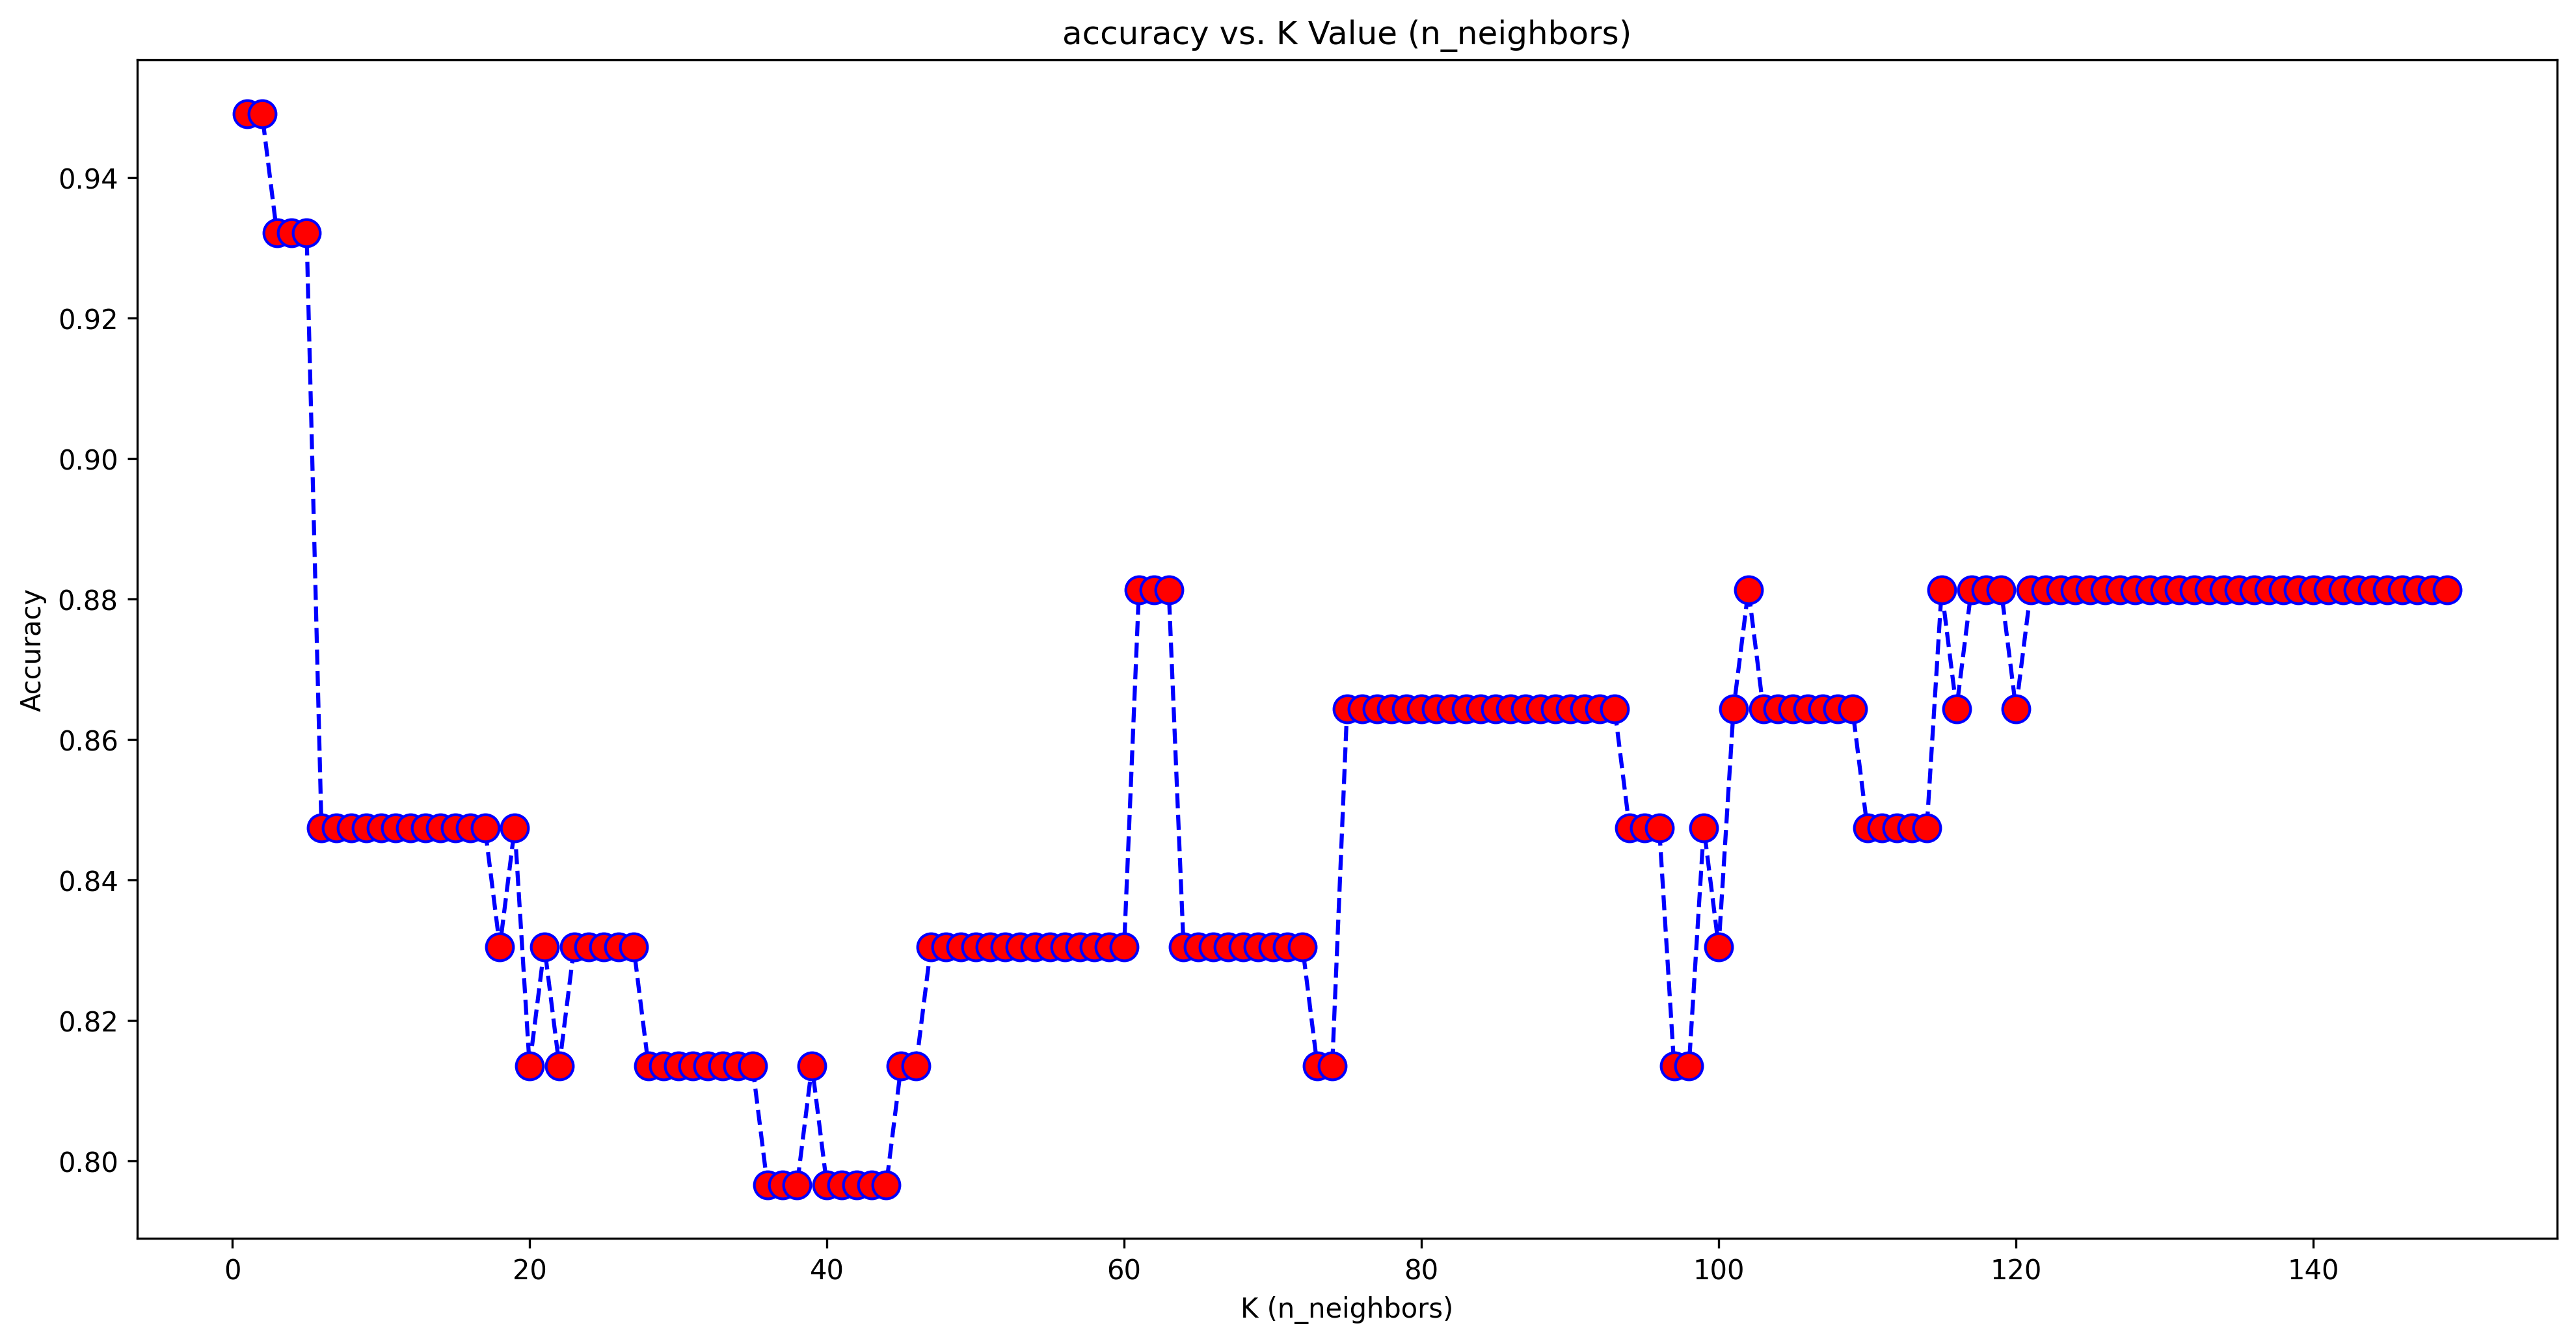

In [35]:
# featureScale(StandardScaler())
# featureScale(RobustScaler())
# featureScale(MinMaxScaler())


import numpy as np

acc = []
# Will take some time
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
for i in range(1,150):
    neigh = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski', p = 2).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
# plt.figure(figsize=(10,6))
plt.figure(figsize=(16, 8), dpi=300)
plt.plot(range(1,150),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value (n_neighbors)')
plt.xlabel('K (n_neighbors)')
plt.ylabel('Accuracy')
arr = pd.DataFrame(data=acc, columns={"acc"})
max=arr['acc'].max()
k =acc.index(max)+1
print(max)
print("Maximum accuracy:-",max,"at K =",k)

[[ 8  3]
 [ 0 48]]
accuracy_score : 0.9491525423728814
Accuracy: 95.38 %
Standard Deviation: 1.92 %
(0.9521435692921235, 0.9491525423728814, 0.9459086854269727, None)


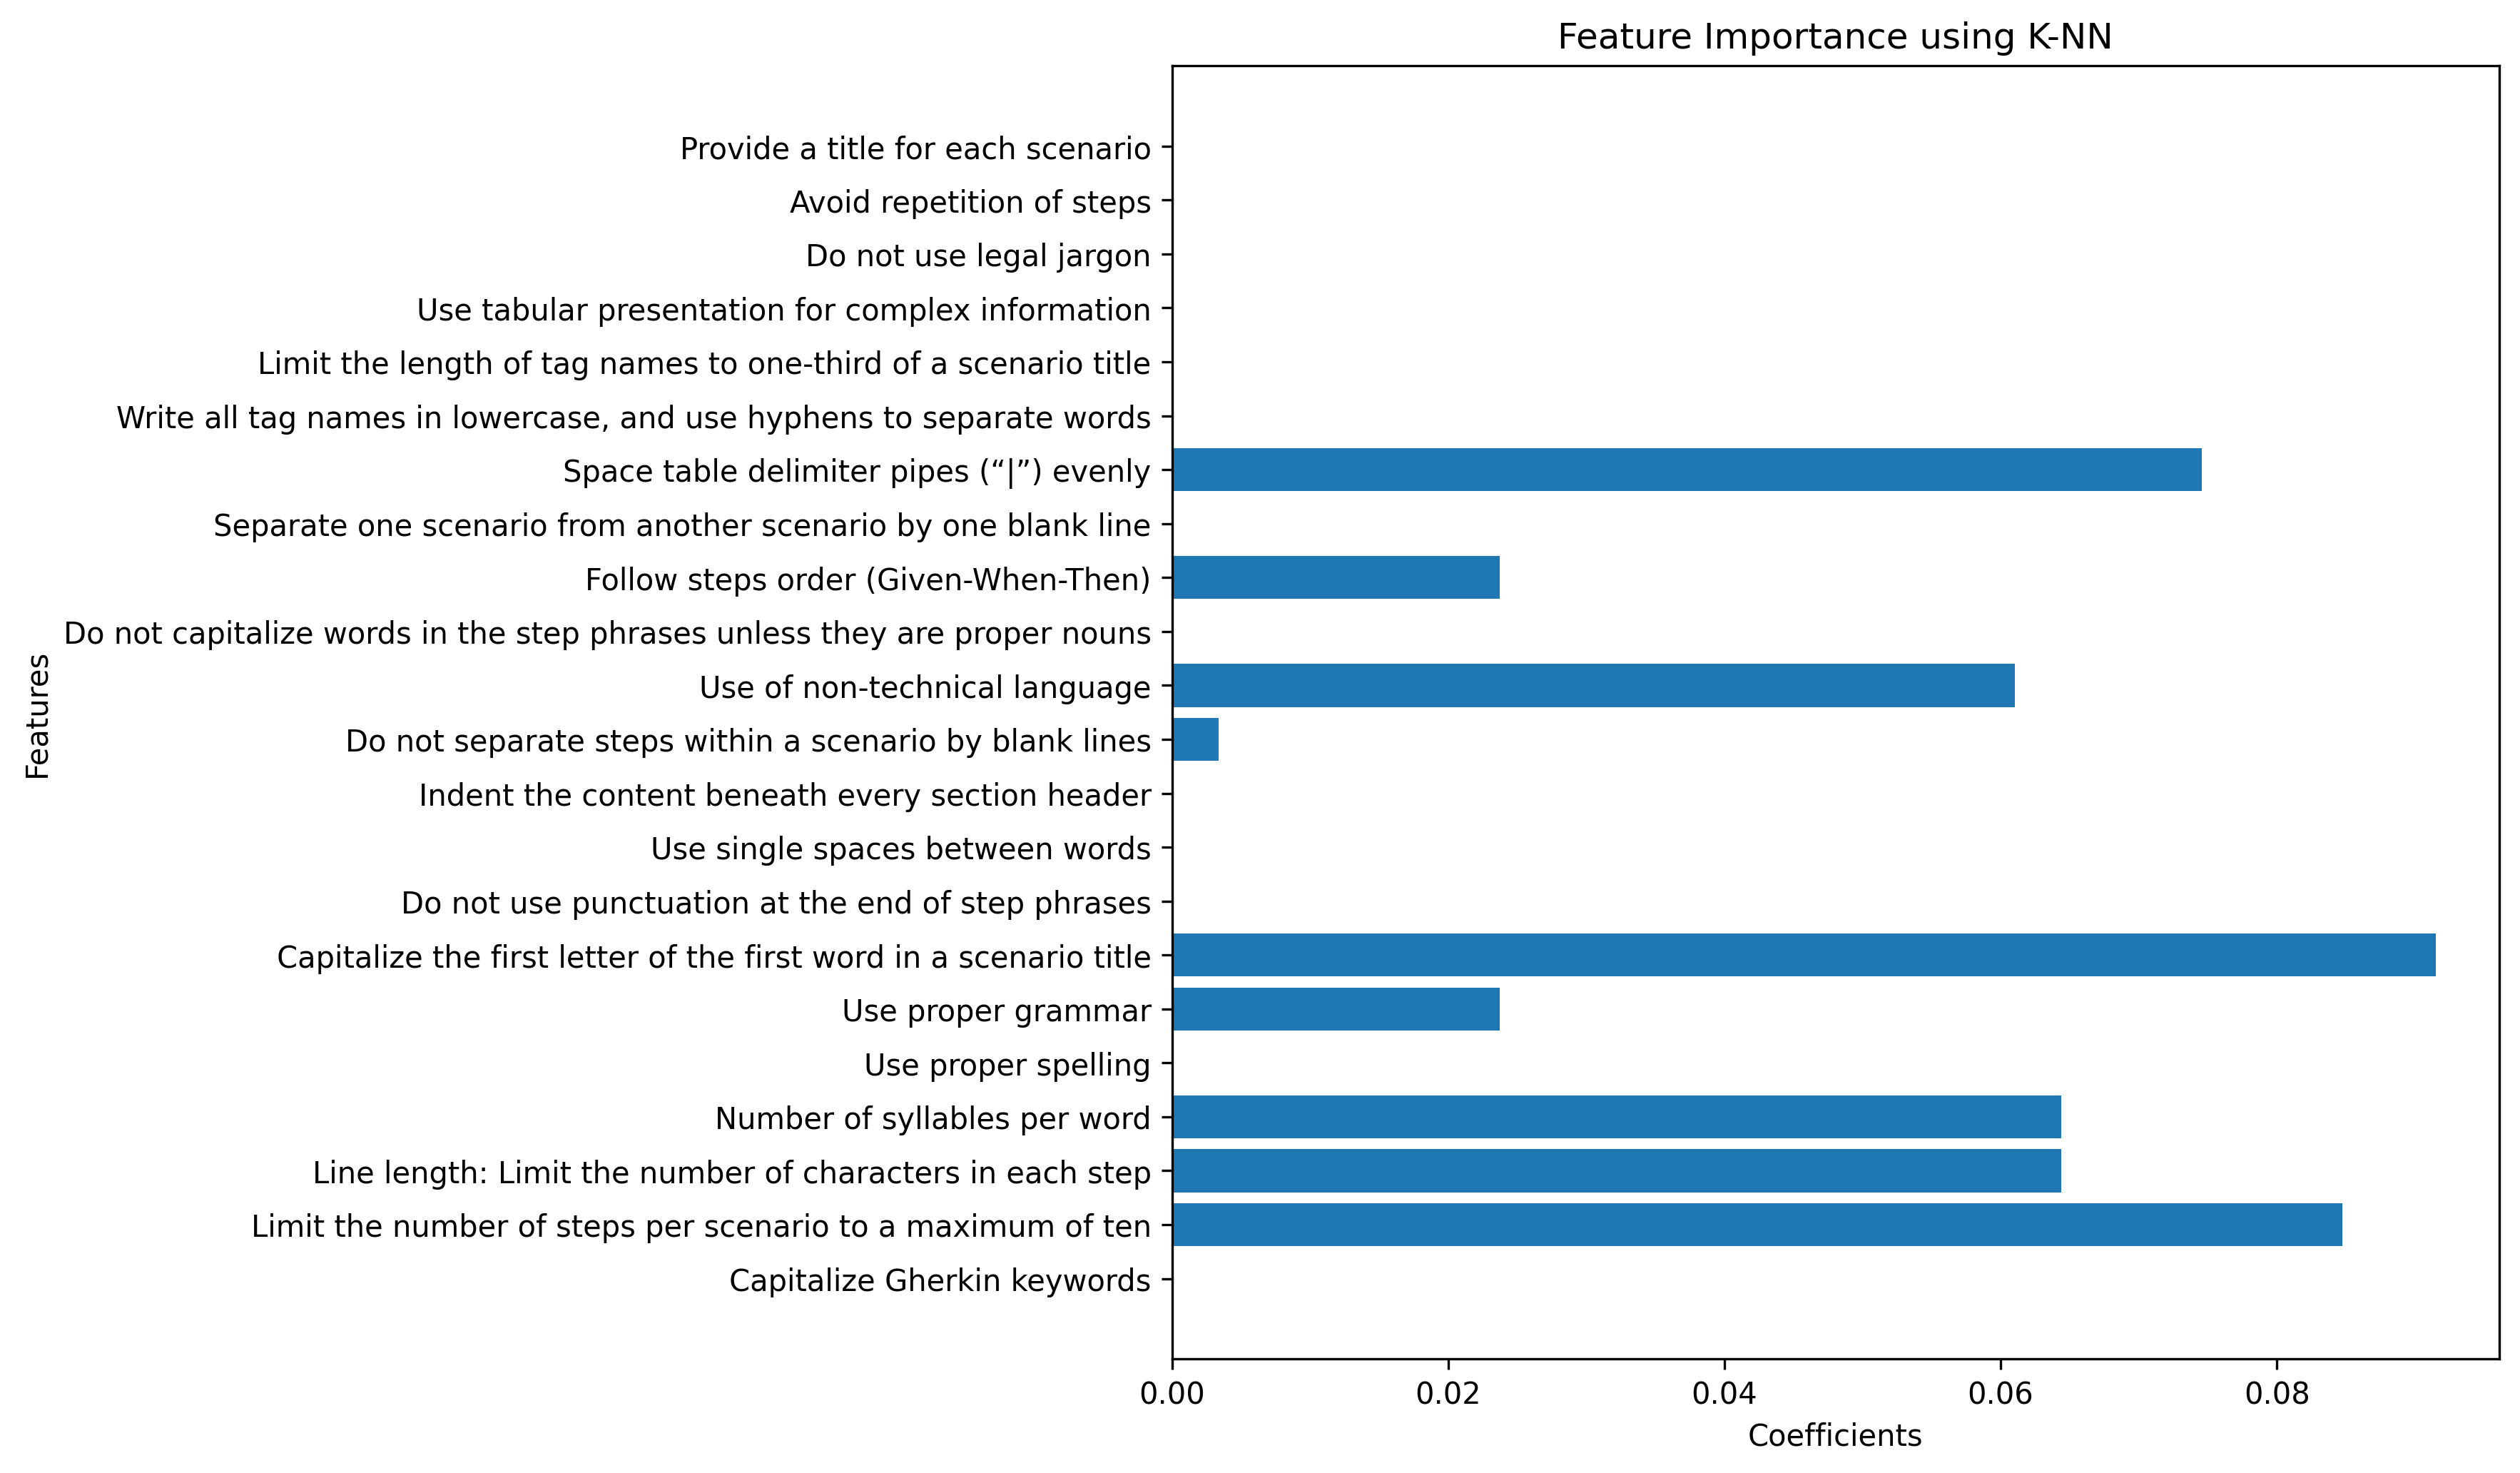

,Coefficient
Capitalize the first letter of the first word in a scenario title,0.091525
Limit the number of steps per scenario to a maximum of ten,0.084746
Space table delimiter pipes (“|”) evenly,0.074576
Line length: Limit the number of characters in each step,0.064407
Number of syllables per word,0.064407
Use of non-technical language,0.061017
Use proper grammar,0.023729
Follow steps order (Given-When-Then),0.023729
Do not separate steps within a scenario by blank lines,0.003390
Avoid repetition of steps,0.000000


In [36]:
k=1
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('accuracy_score :',accuracy_score(y_test, y_pred))

print("=================")
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

print("=================")
from sklearn.metrics import precision_recall_fscore_support
k_nn=precision_recall_fscore_support(y_test, y_pred, average='weighted')
print(k_nn)

print("=================")

imps = permutation_importance(classifier, X_test, y_test)
# print(imps.importances_mean)
importance = imps.importances_mean
features=dataset.columns
coef_dict = {}
for coef, feat in zip(importance,features):
    coef_dict[feat] = coef
#     print (feat,"#",coef_dict[feat])
coef_dict

plt.figure(figsize=(8, 8), dpi=300)
plt.title("Feature Importance using K-NN")
plt.ylabel("Features")
plt.xlabel("Coefficients")
plt.barh(*zip(*coef_dict.items()))
plt.savefig('KNN.png', dpi=300)

plt.show()


pd.DataFrame(importance, 
             dataset.columns[0:22], 
             columns=['Coefficient']).sort_values(by='Coefficient', ascending=False)

## Training the Kernel SVM model on the Training set

In [37]:
from sklearn.svm import SVC
kernels = ['linear', 'rbf', 'poly']
# gammas = [0.010.1, 1, 10, 100]

In [38]:
classifier = SVC(kernel = kernels[1], random_state = 0)
classifier.fit(X_train, y_train)

## Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("=================")
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

print("=================")
from sklearn.metrics import precision_recall_fscore_support
k_svm=precision_recall_fscore_support(y_test, y_pred, average='weighted')
k_svm

[[ 9  2]
 [ 3 45]]
Accuracy: 92.31 %
Standard Deviation: 4.59 %


(0.9187702848900108, 0.9152542372881356, 0.9166505061474615, None)

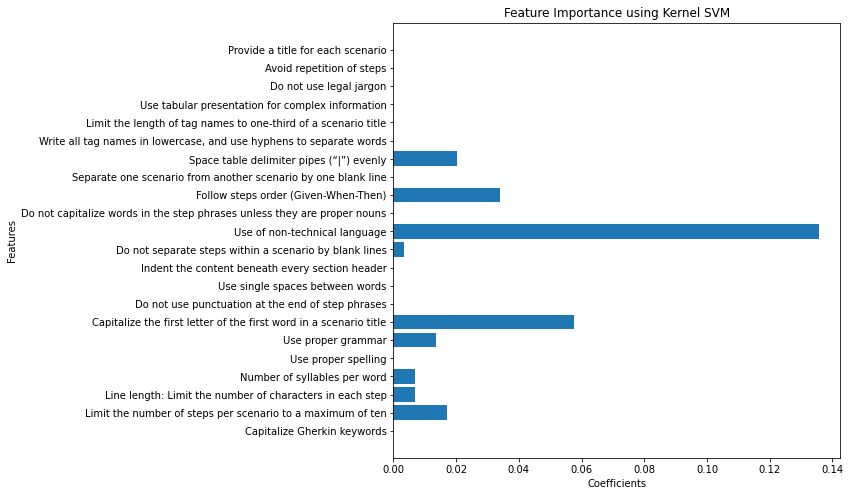

,coef
Use of non-technical language,0.135593
Capitalize the first letter of the first word in a scenario title,0.057627
Follow steps order (Given-When-Then),0.033898
Space table delimiter pipes (“|”) evenly,0.020339
Limit the number of steps per scenario to a maximum of ten,0.016949
Use proper grammar,0.013559
Line length: Limit the number of characters in each step,0.006780
Number of syllables per word,0.006780
Do not separate steps within a scenario by blank lines,0.003390
Avoid repetition of steps,0.000000


In [39]:
imps = permutation_importance(classifier, X_test, y_test)
# print(imps.importances_mean)
importance = imps.importances_mean
features=dataset.columns
coef_dict = {}
for coef, feat in zip(importance,features):
    coef_dict[feat] = coef
#     print (feat,"#",coef_dict[feat])
coef_dict

plt.figure(figsize=(8,8))
plt.title("Feature Importance using Kernel SVM")
plt.ylabel("Features")
plt.xlabel("Coefficients")
plt.barh(*zip(*coef_dict.items()))

plt.show()

pd.DataFrame(importance, 
             dataset.columns[0:22], 
             columns=['coef']).sort_values(by='coef', ascending=False)

## Training the Naive Bayes model on the Training set

In [40]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
classifier = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
classifier.fit(X_train, y_train)
print(classifier.best_estimator_)


from sklearn.metrics import classification_report
y_pred = classifier.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))
# print(classification_report(y_test, y_pred,target_names=['Less readable','Readable']))

print("=================")
y_train_pred = classifier.predict(X_train)
print('accuracy Training : %f' % accuracy_score(y_train_pred, y_train))


print('Training set score: {:.4f}'.format(classifier.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(classifier.score(X_test, y_test)))

import collections, numpy
value_counts=collections.Counter(y_test)
print(value_counts)
# y_test.value_counts()
null_accuracy = (107/(107+40))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

print("=================")
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

from sklearn.metrics import precision_recall_fscore_support
nb=precision_recall_fscore_support(y_test, y_pred, average='weighted')
nb

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.15199110829529336)
accuracy 0.864406779661017
accuracy Training : 0.861538
Training set score: 0.8615
Test set score: 0.8644
Counter({1: 48, 0: 11})
Null accuracy score: 0.7279
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Accuracy: 85.38 %
Standard Deviation: 5.51 %


(0.8884437596302004, 0.864406779661017, 0.8718893486763788, None)

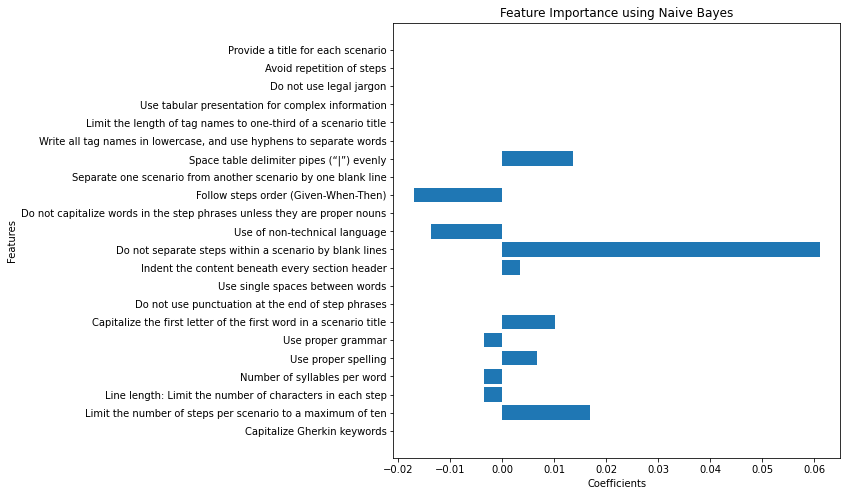

,coef
Do not separate steps within a scenario by blank lines,0.061017
Limit the number of steps per scenario to a maximum of ten,0.016949
Space table delimiter pipes (“|”) evenly,0.013559
Capitalize the first letter of the first word in a scenario title,0.010169
Use proper spelling,0.006780
Indent the content beneath every section header,0.003390
Capitalize Gherkin keywords,0.000000
Separate one scenario from another scenario by one blank line,0.000000
Avoid repetition of steps,0.000000
Do not use legal jargon,0.000000


In [41]:
imps = permutation_importance(classifier, X_test, y_test)
# print(imps.importances_mean)
importance = imps.importances_mean
features=dataset.columns
coef_dict = {}
for coef, feat in zip(importance,features):
    coef_dict[feat] = coef
#     print (feat,"#",coef_dict[feat])
coef_dict

plt.figure(figsize=(8,8))
plt.title("Feature Importance using Naive Bayes")
plt.ylabel("Features")
plt.xlabel("Coefficients")
plt.barh(*zip(*coef_dict.items()))

plt.show()
pd.DataFrame(importance, 
             dataset.columns[0:22], 
             columns=['coef']).sort_values(by='coef', ascending=False)

## Training the Random Forest Classification model on the Training set

best n_estimators is 1 with best acc 0.9322033898305084
[[ 8  3]
 [ 1 47]]
[0.92307692 0.94871795 0.97435897 0.97435897 0.94871795 0.92307692
 0.97435897 0.8974359  1.         0.8974359 ]
Accuracy: 94.62 %
Standard Deviation: 3.33 %
(0.9304708097928437, 0.9322033898305084, 0.9295053614666204, None)


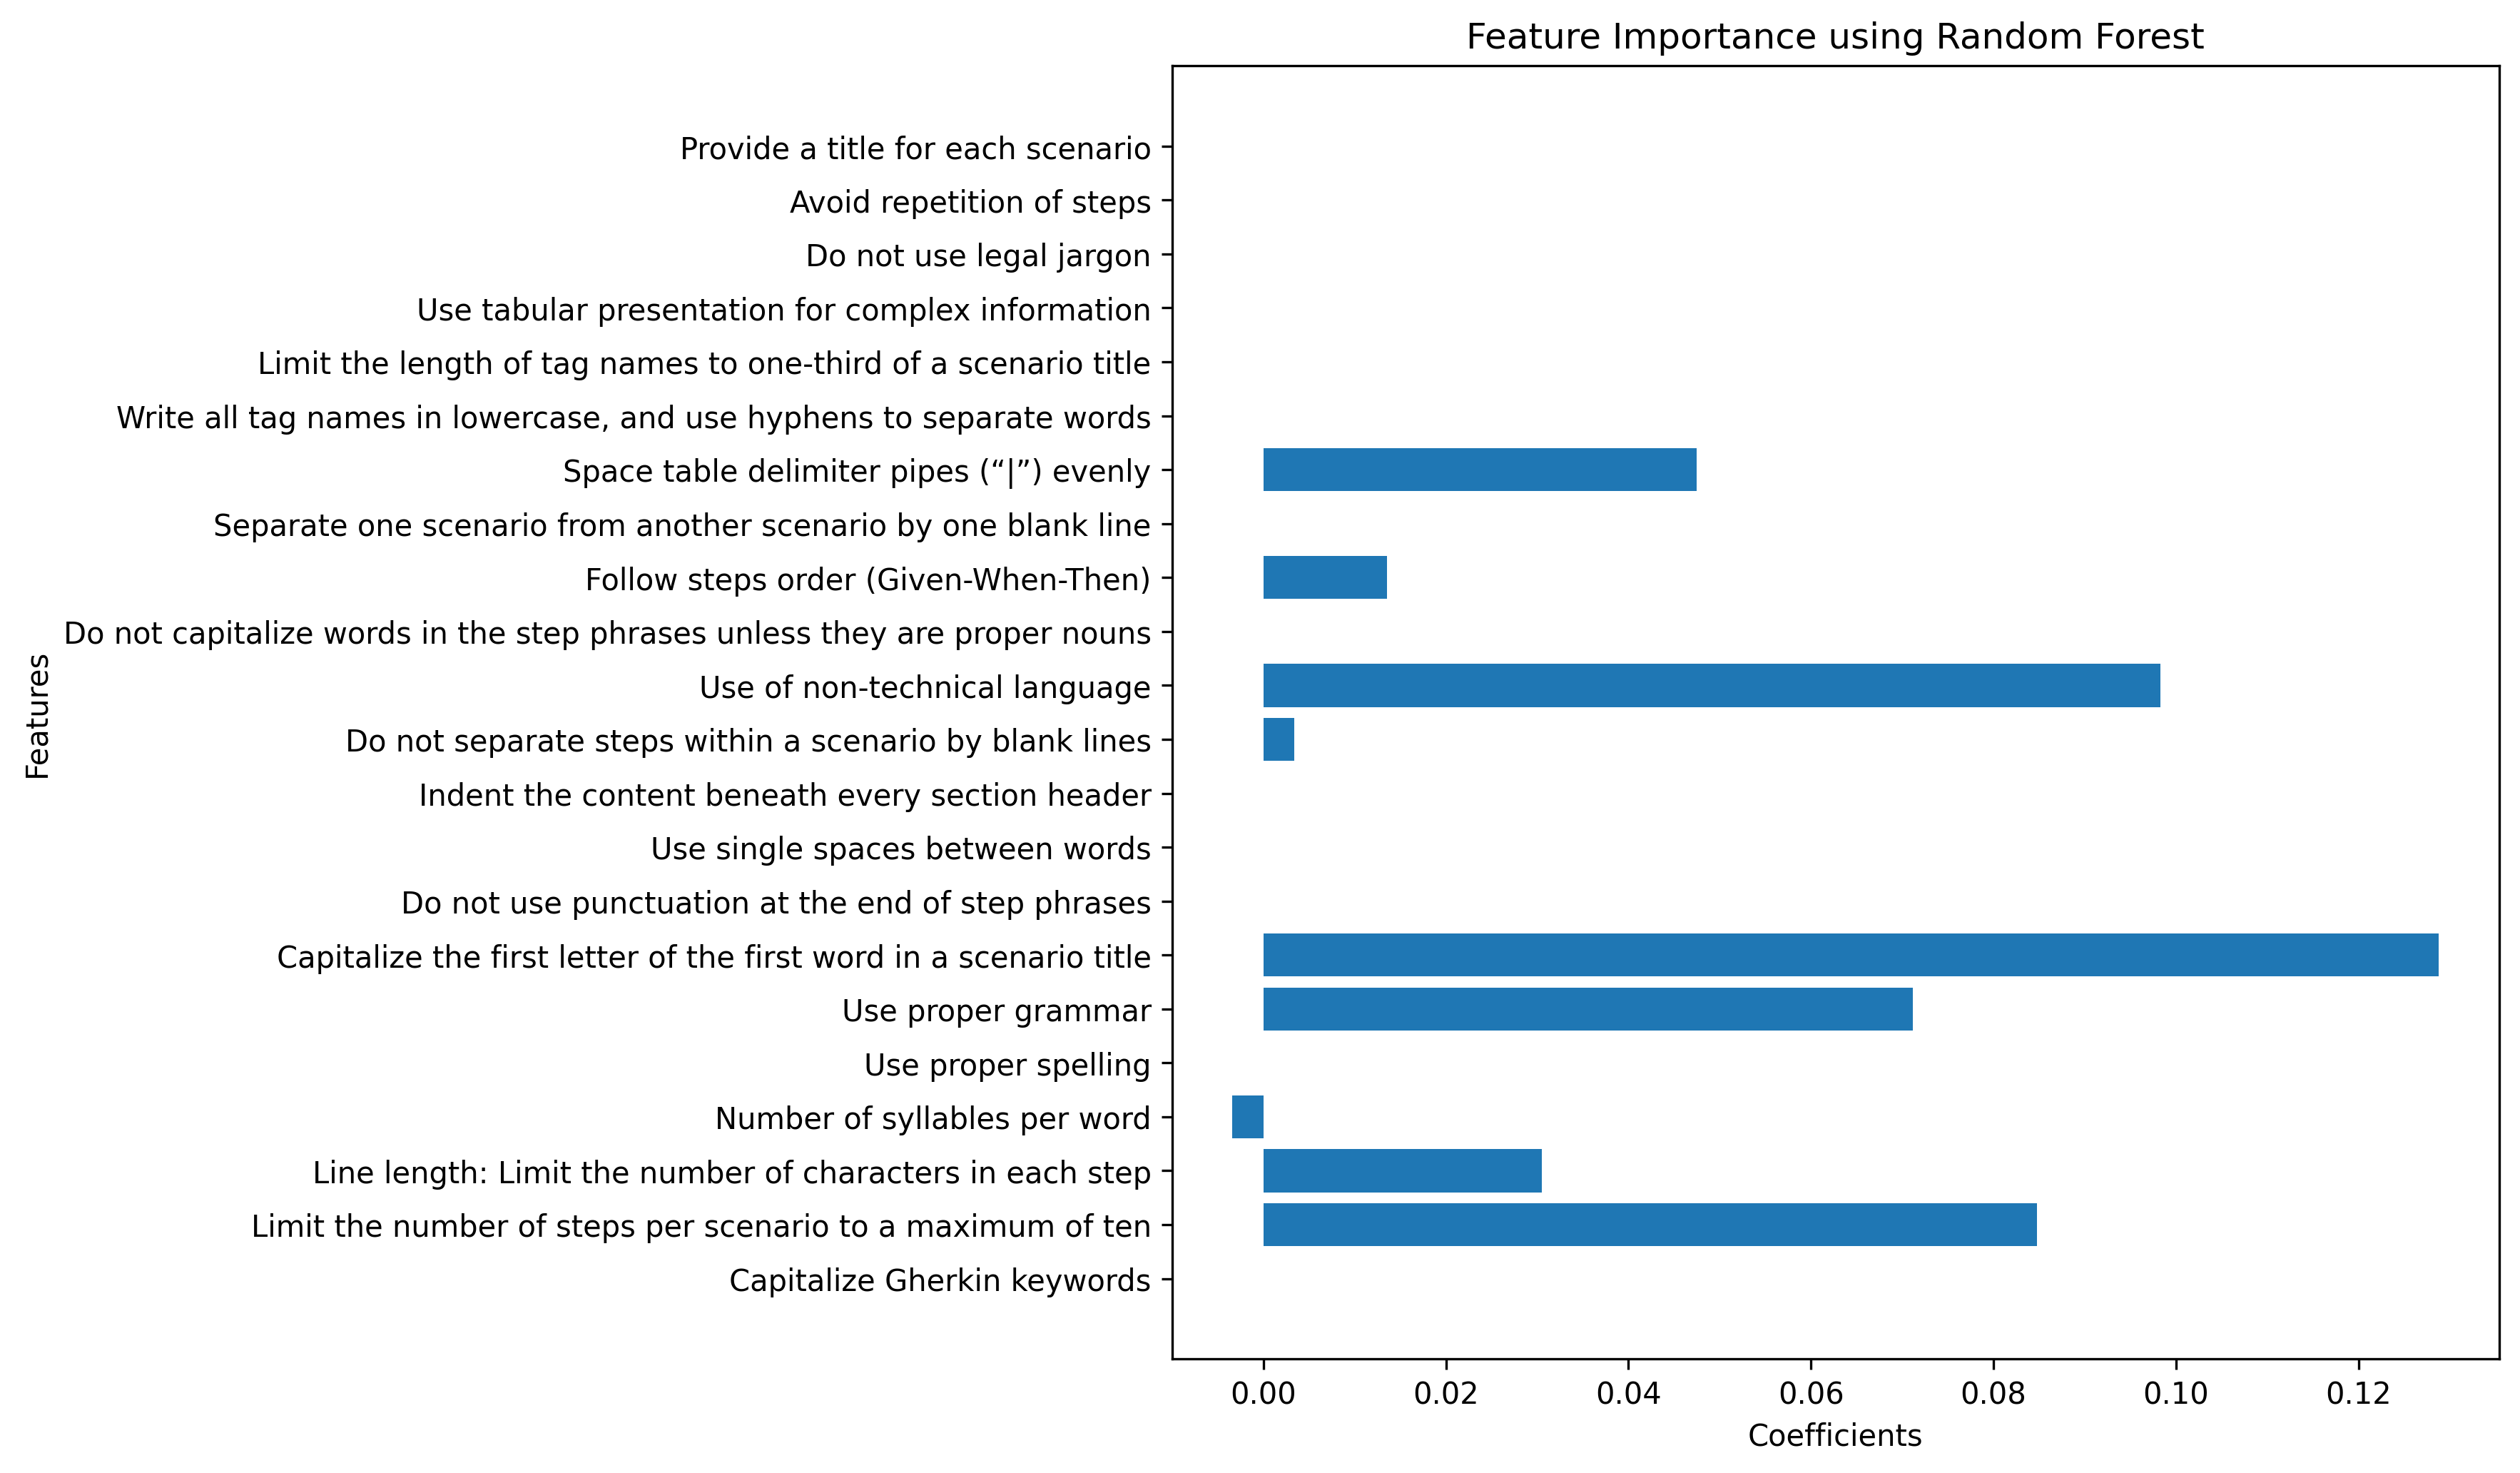

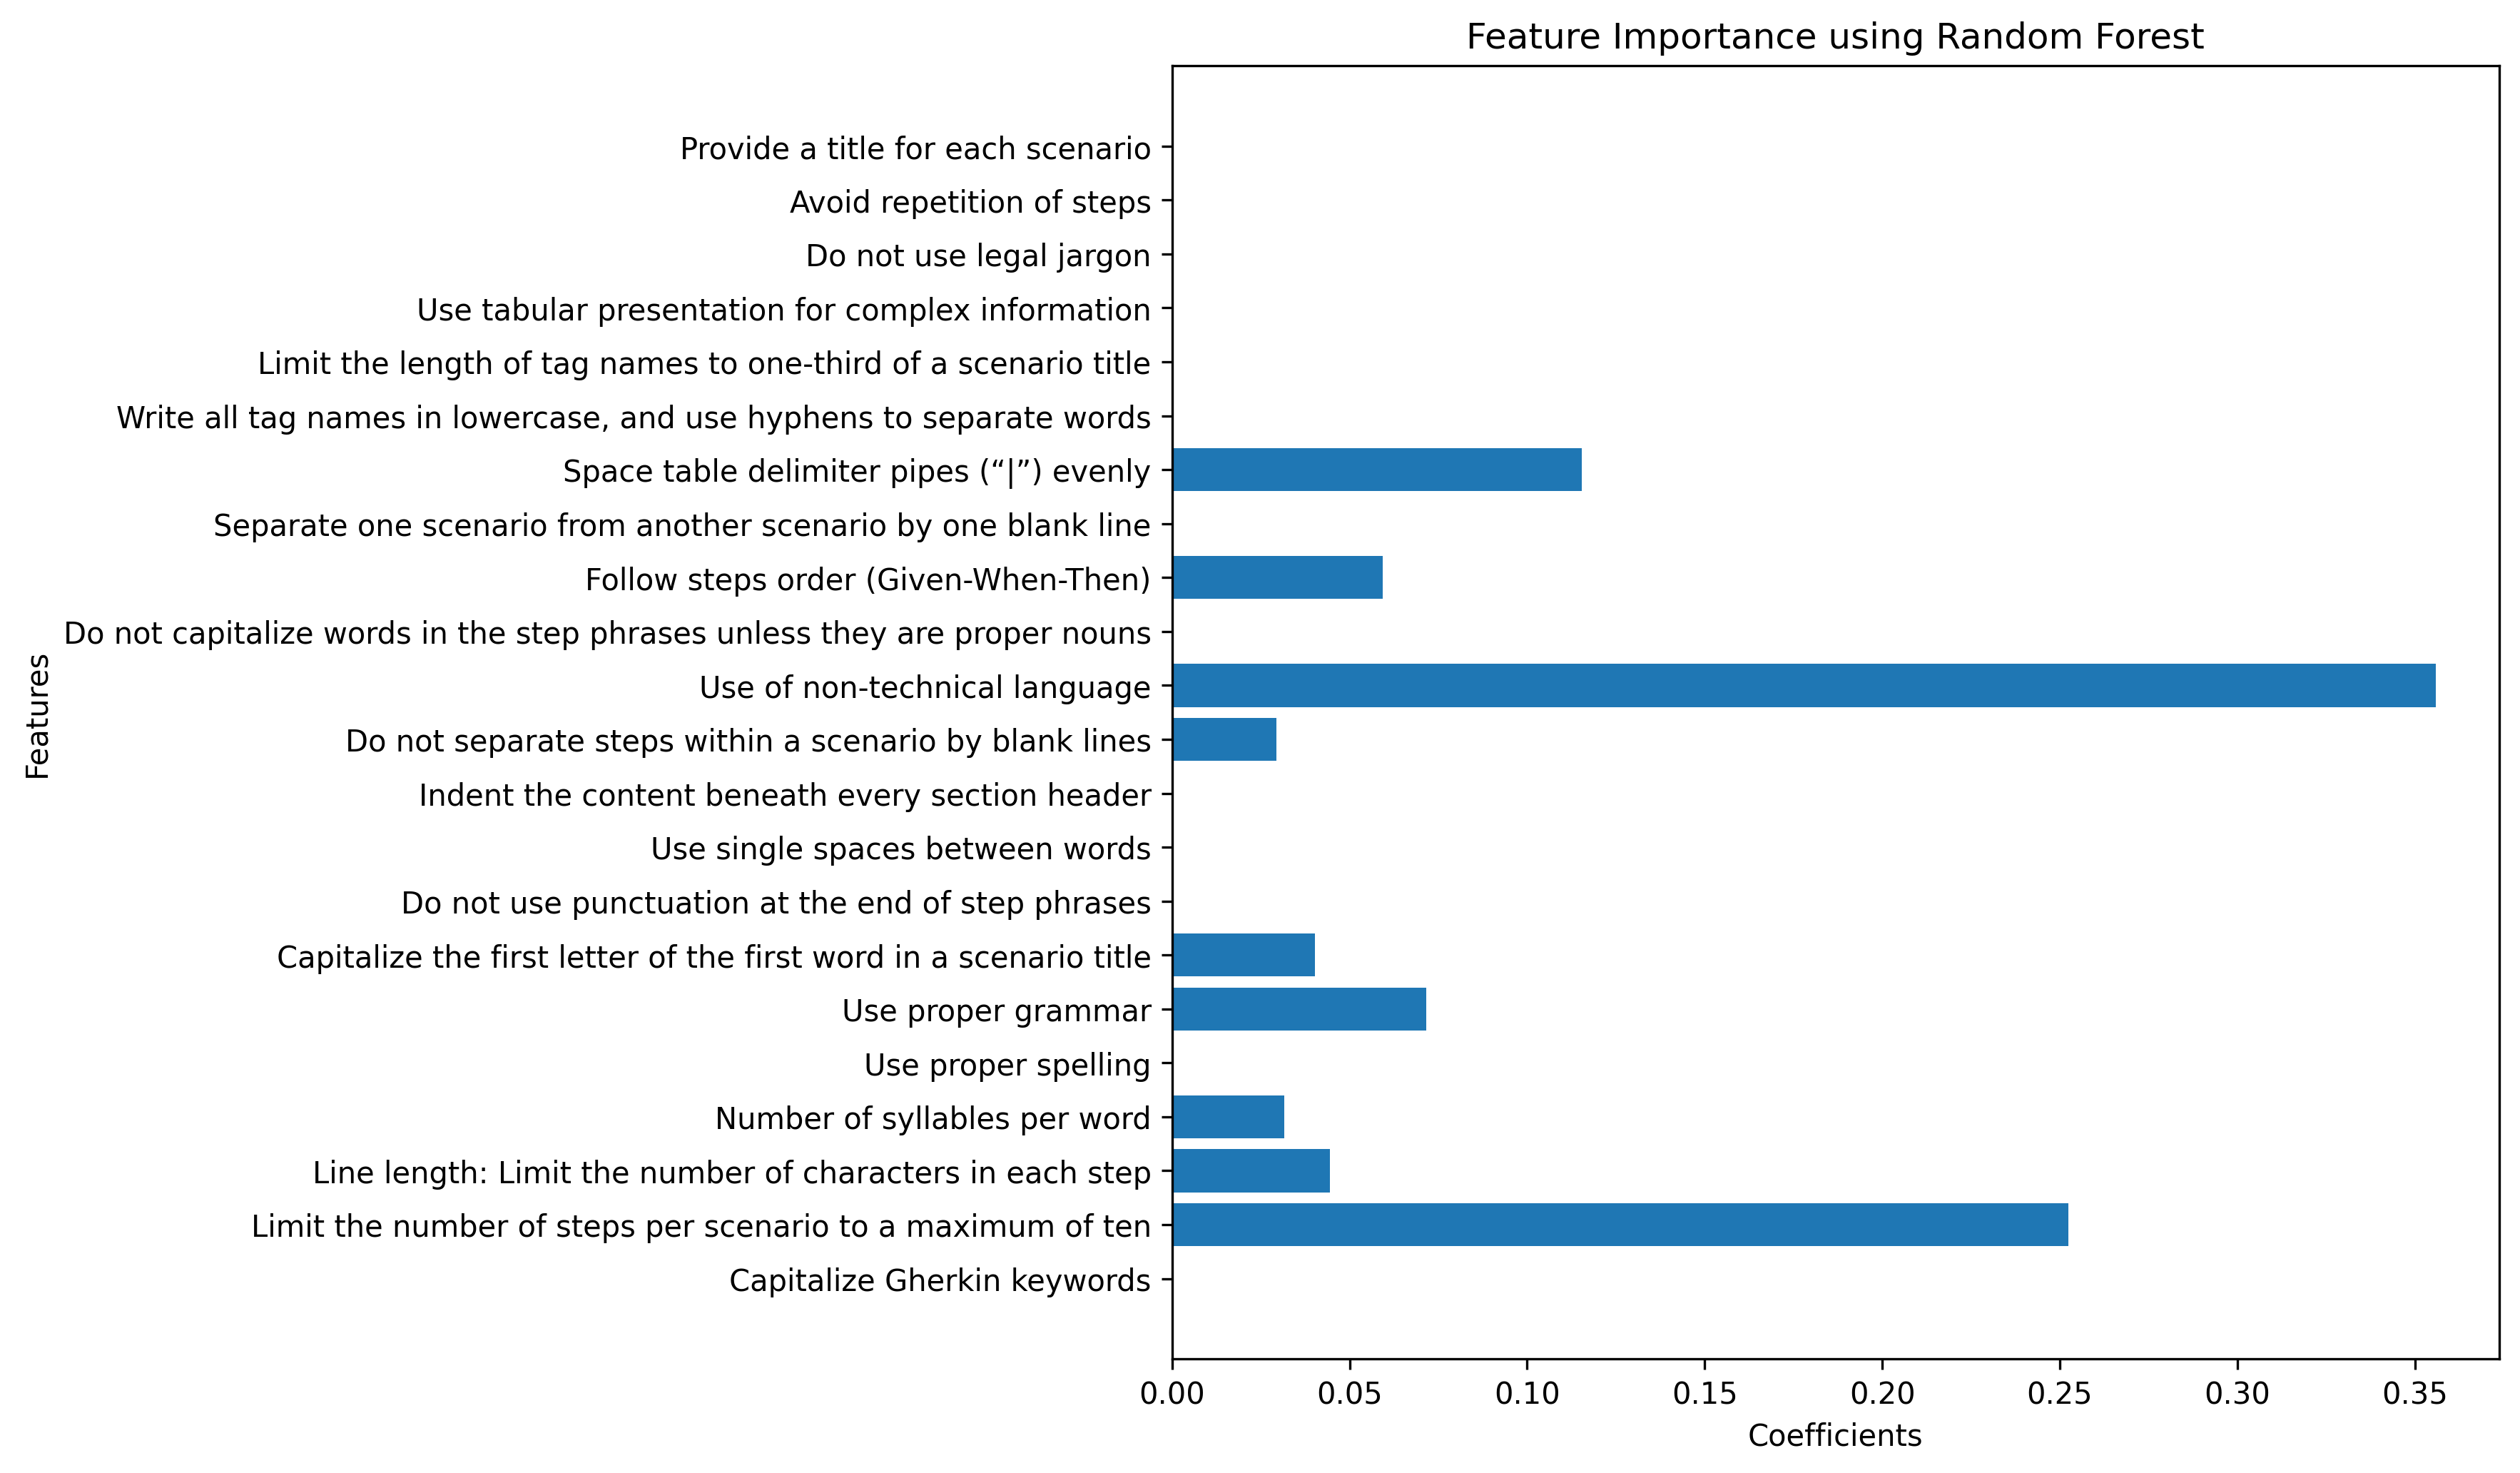

,coef
Use of non-technical language,0.355949
Limit the number of steps per scenario to a maximum of ten,0.252397
Space table delimiter pipes (“|”) evenly,0.115333
Use proper grammar,0.071635
Follow steps order (Given-When-Then),0.059239
Line length: Limit the number of characters in each step,0.044405
Capitalize the first letter of the first word in a scenario title,0.040220
Number of syllables per word,0.031497
Do not separate steps within a scenario by blank lines,0.029325
Avoid repetition of steps,0.000000


In [42]:
from sklearn.ensemble import RandomForestClassifier
best_acc=0
best_n=1
for n in range(1,100):
    classifier = RandomForestClassifier(n_estimators = n, criterion = 'entropy', random_state = 1)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)
#     print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

    from sklearn.metrics import confusion_matrix, accuracy_score
    cm = confusion_matrix(y_test, y_pred)
    acc=accuracy_score(y_test, y_pred)
    
#     print(n)
#     print(acc)
    if best_acc<acc:
        best_acc=acc
        best_n=n
        
print("best n_estimators is {} with best acc {}".format(best_n, best_acc))
classifier = RandomForestClassifier(n_estimators = best_n, criterion = 'entropy', random_state = 1)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc=accuracy_score(y_test, y_pred)

print("=================")
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print("=================")
from sklearn.metrics import precision_recall_fscore_support
rf=precision_recall_fscore_support(y_test, y_pred, average='weighted')
print(rf)

print("=================")
imps = permutation_importance(classifier, X_test, y_test)
# print(imps.importances_mean)
importance = imps.importances_mean
features=dataset.columns
coef_dict = {}
for coef, feat in zip(importance,features):
    coef_dict[feat] = coef
#     print (feat,"#",coef_dict[feat])
coef_dict

plt.figure(figsize=(8, 8), dpi=300)
plt.title("Feature Importance using Random Forest")
plt.ylabel("Features")
plt.xlabel("Coefficients")
plt.barh(*zip(*coef_dict.items()))
# plt.savefig('DT.png', dpi=300)
plt.show()

print("=================")
importance = classifier.feature_importances_
features=dataset.columns
coef_dict = {}
for coef, feat in zip(importance,features):
    coef_dict[feat] = coef
#     print (feat,"#",coef_dict[feat])
coef_dict

plt.figure(figsize=(8, 8), dpi=300)
plt.title("Feature Importance using Random Forest")
plt.ylabel("Features")
plt.xlabel("Coefficients")
plt.barh(*zip(*coef_dict.items()))
# plt.savefig('DT.png', dpi=300)
plt.show()

pd.DataFrame(importance, 
             dataset.columns[0:22], 
             columns=['coef']).sort_values(by='coef', ascending=False)

## Training the SVM model on the Training set

/usr/local/Cellar/jupyterlab/3.0.16/libexec/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/Cellar/jupyterlab/3.0.16/libexec/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/Cellar/jupyterlab/3.0.16/libexec/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/Cellar/jupyterlab/3.0.16/libexec/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/Cellar/jupyterlab/3.0.16/

best C is 1 with best acc 0.847457627118644
[[ 9  2]
 [ 7 41]]
Accuracy: 90.26 %
Standard Deviation: 4.26 %
(0.8805922349231377, 0.847457627118644, 0.8573911963742473, None)


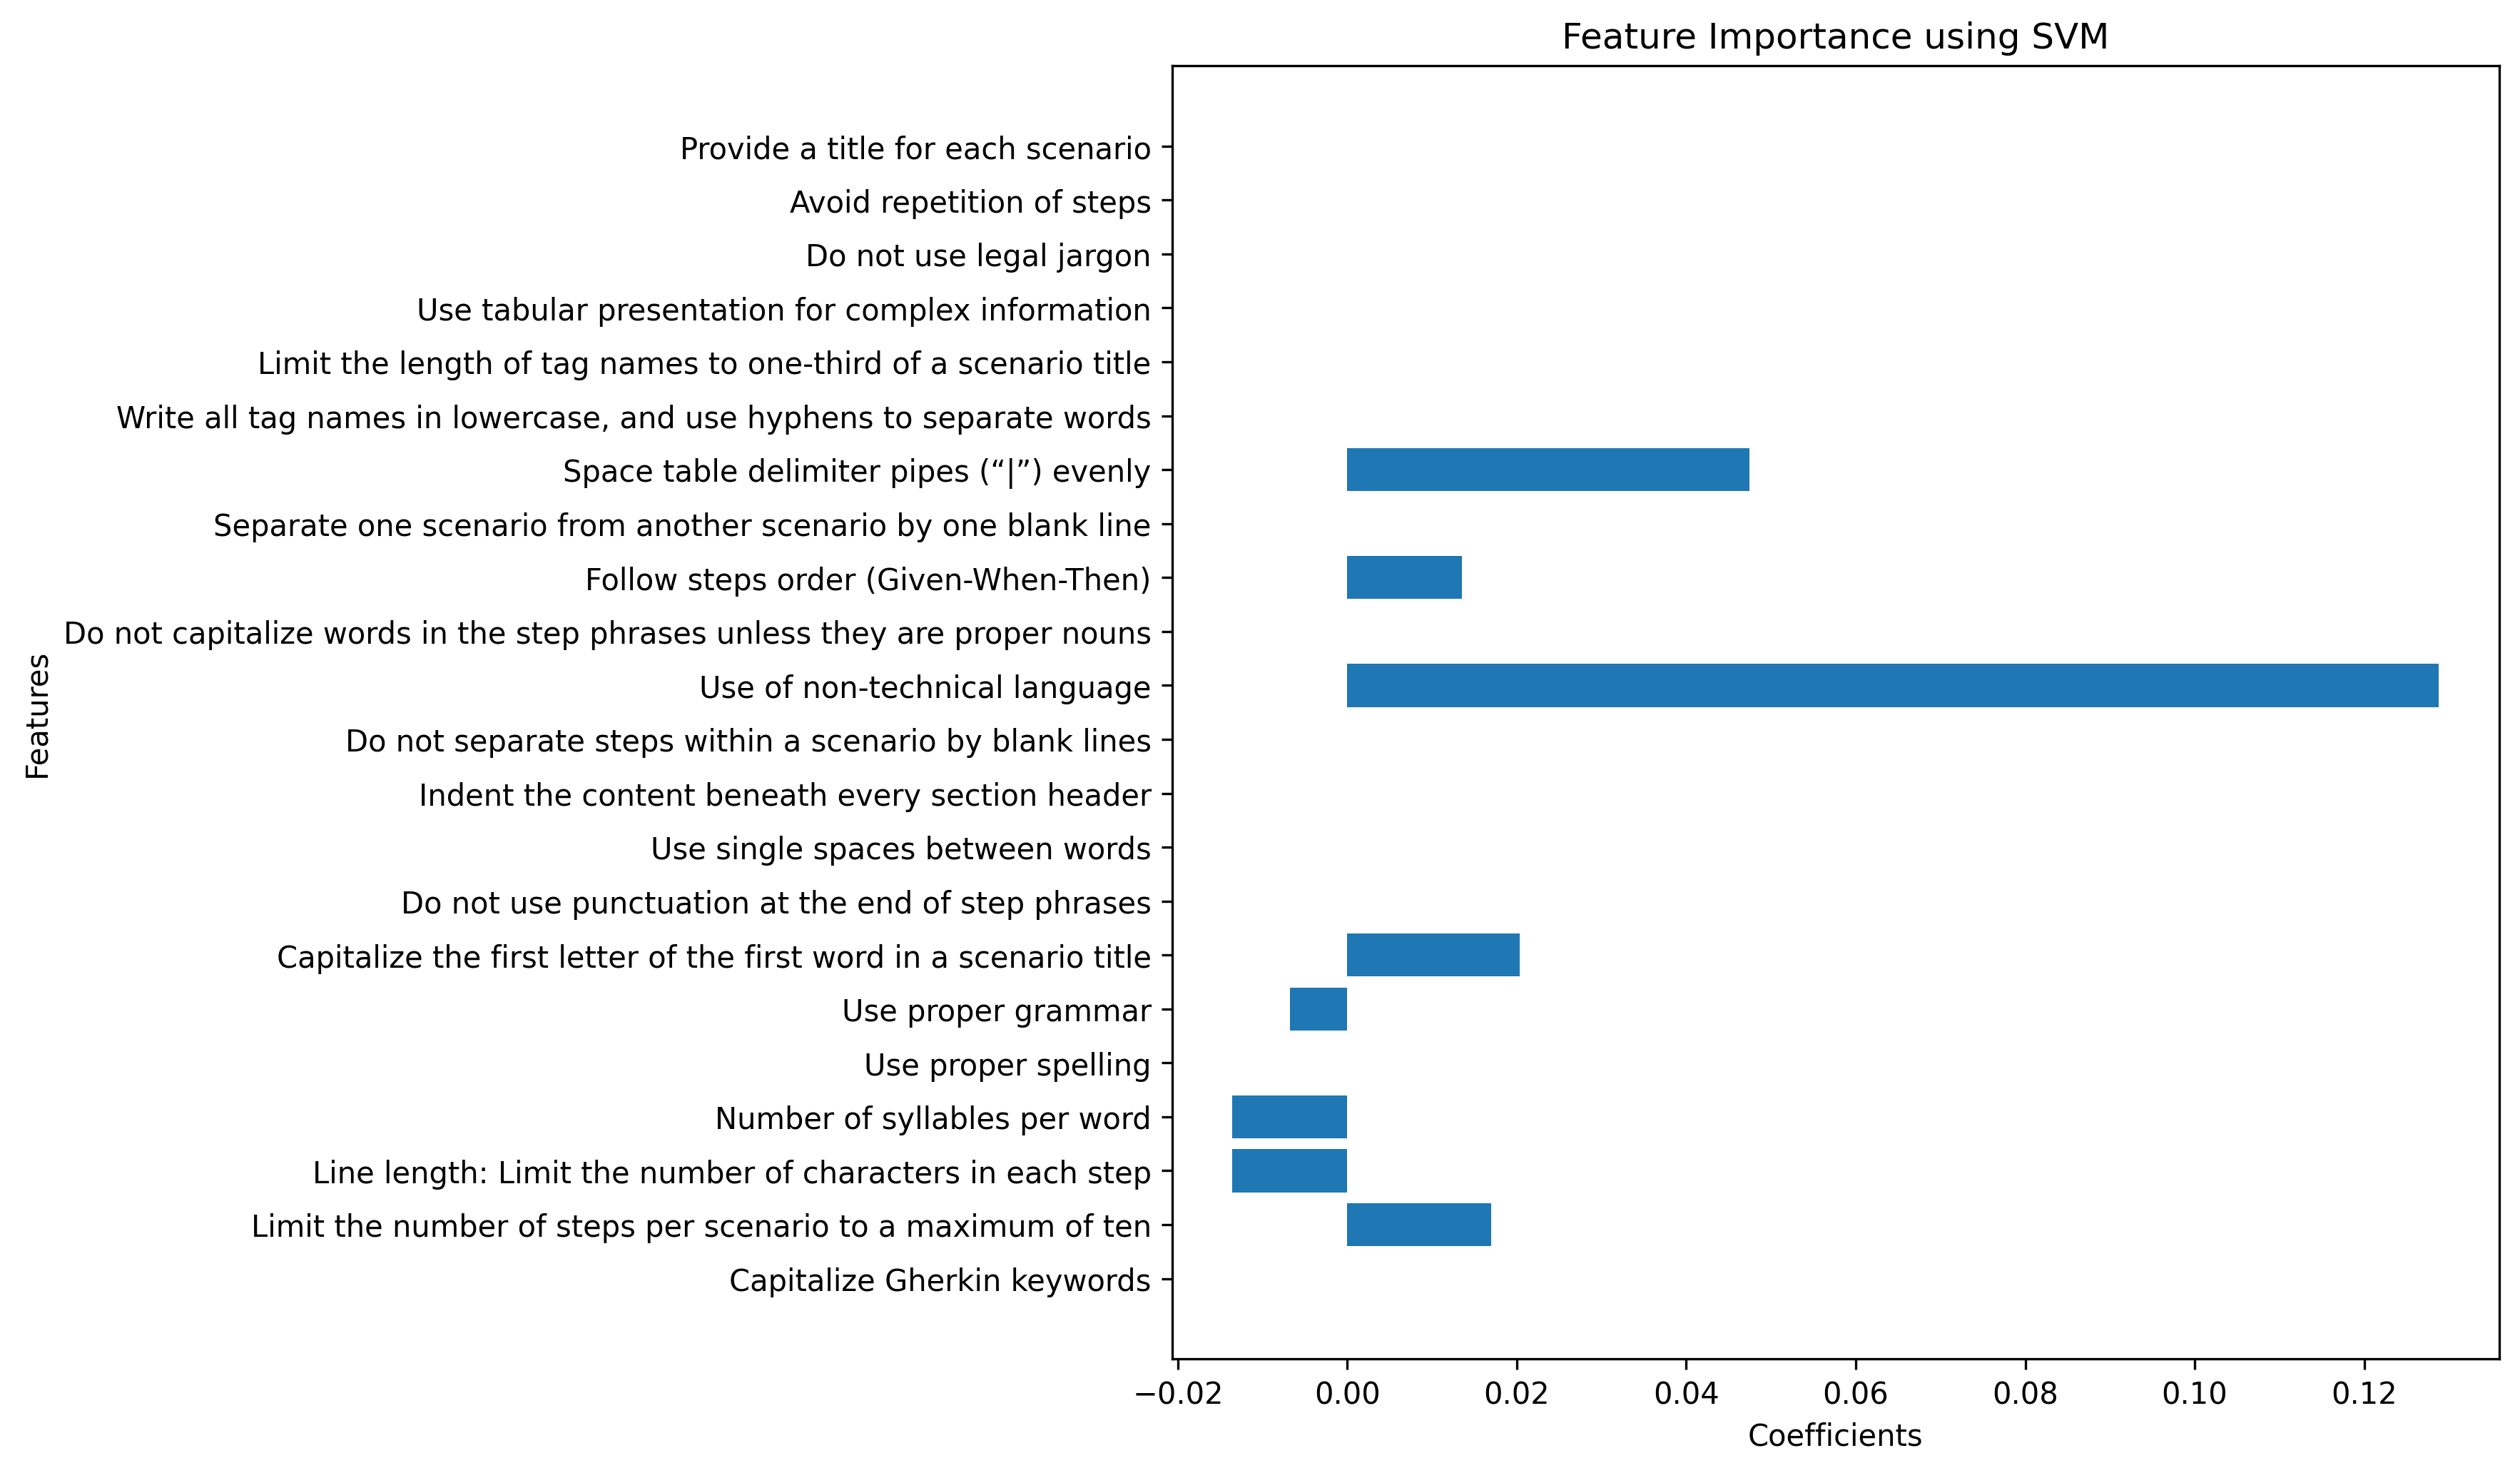

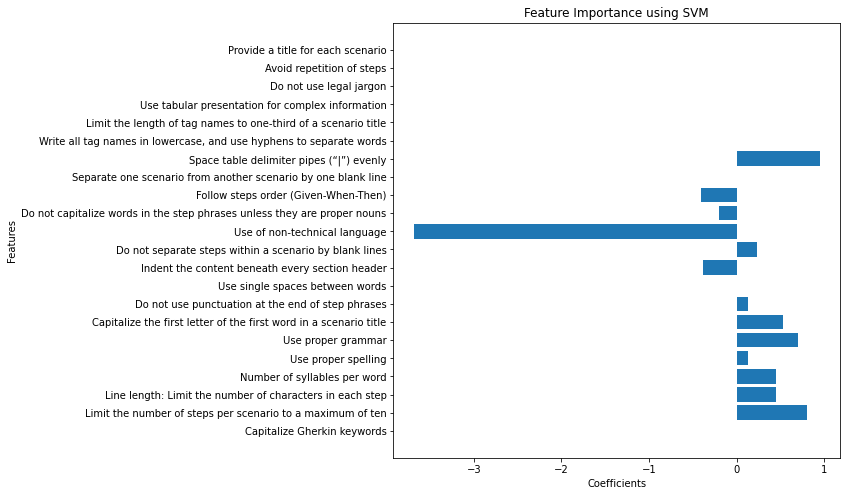

,coef
Space table delimiter pipes (“|”) evenly,0.944854
Limit the number of steps per scenario to a maximum of ten,0.801245
Use proper grammar,0.697224
Capitalize the first letter of the first word in a scenario title,0.523065
Line length: Limit the number of characters in each step,0.447959
Number of syllables per word,0.447959
Do not separate steps within a scenario by blank lines,0.234392
Use proper spelling,0.126904
Do not use punctuation at the end of step phrases,0.126904
Capitalize Gherkin keywords,0.000000


In [43]:
from sklearn.svm import LinearSVC
best_C=1
best_acc=0
for c in range(1,10):
    classifier = LinearSVC(C=c, random_state = 0)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)
    # print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

    from sklearn.metrics import confusion_matrix, accuracy_score
    cm = confusion_matrix(y_test, y_pred)
    acc=accuracy_score(y_test, y_pred)

    if best_acc<acc:
        best_acc=acc
        best_n=n
        
print("best C is {} with best acc {}".format(best_C, best_acc))

classifier = LinearSVC(C=best_C, random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

print("=================")
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

print("=================")
from sklearn.metrics import precision_recall_fscore_support
svm=precision_recall_fscore_support(y_test, y_pred, average='weighted')
print(svm)

print("=================")
imps = permutation_importance(classifier, X_test, y_test)
# print(imps.importances_mean)
importance = imps.importances_mean
features=dataset.columns
coef_dict = {}
for coef, feat in zip(importance,features):
    coef_dict[feat] = coef
#     print (feat,"#",coef_dict[feat])
coef_dict

plt.figure(figsize=(8, 8), dpi=300)
plt.title("Feature Importance using SVM")
plt.ylabel("Features")
plt.xlabel("Coefficients")
plt.barh(*zip(*coef_dict.items()))
# plt.savefig('DT.png', dpi=300)
plt.show()

print("=================")

importance = classifier.coef_[0]
features=dataset.columns
coef_dict = {}
for coef, feat in zip(importance,features):
    coef_dict[feat] = coef
#     print (feat,"#",coef_dict[feat])
coef_dict

plt.figure(figsize=(8,8))
plt.title("Feature Importance using SVM")
plt.ylabel("Features")
plt.xlabel("Coefficients")
plt.barh(*zip(*coef_dict.items()))

plt.show()

pd.DataFrame(importance, 
             dataset.columns[0:22], 
             columns=['coef']).sort_values(by='coef', ascending=False)

## Training the Logistic Regression model on the Training set

[[ 9  2]
 [ 4 44]]
Accuracy: 88.46 %
Standard Deviation: 4.48 %
(0.9072614931126354, 0.8983050847457628, 0.9014605120807788, None)


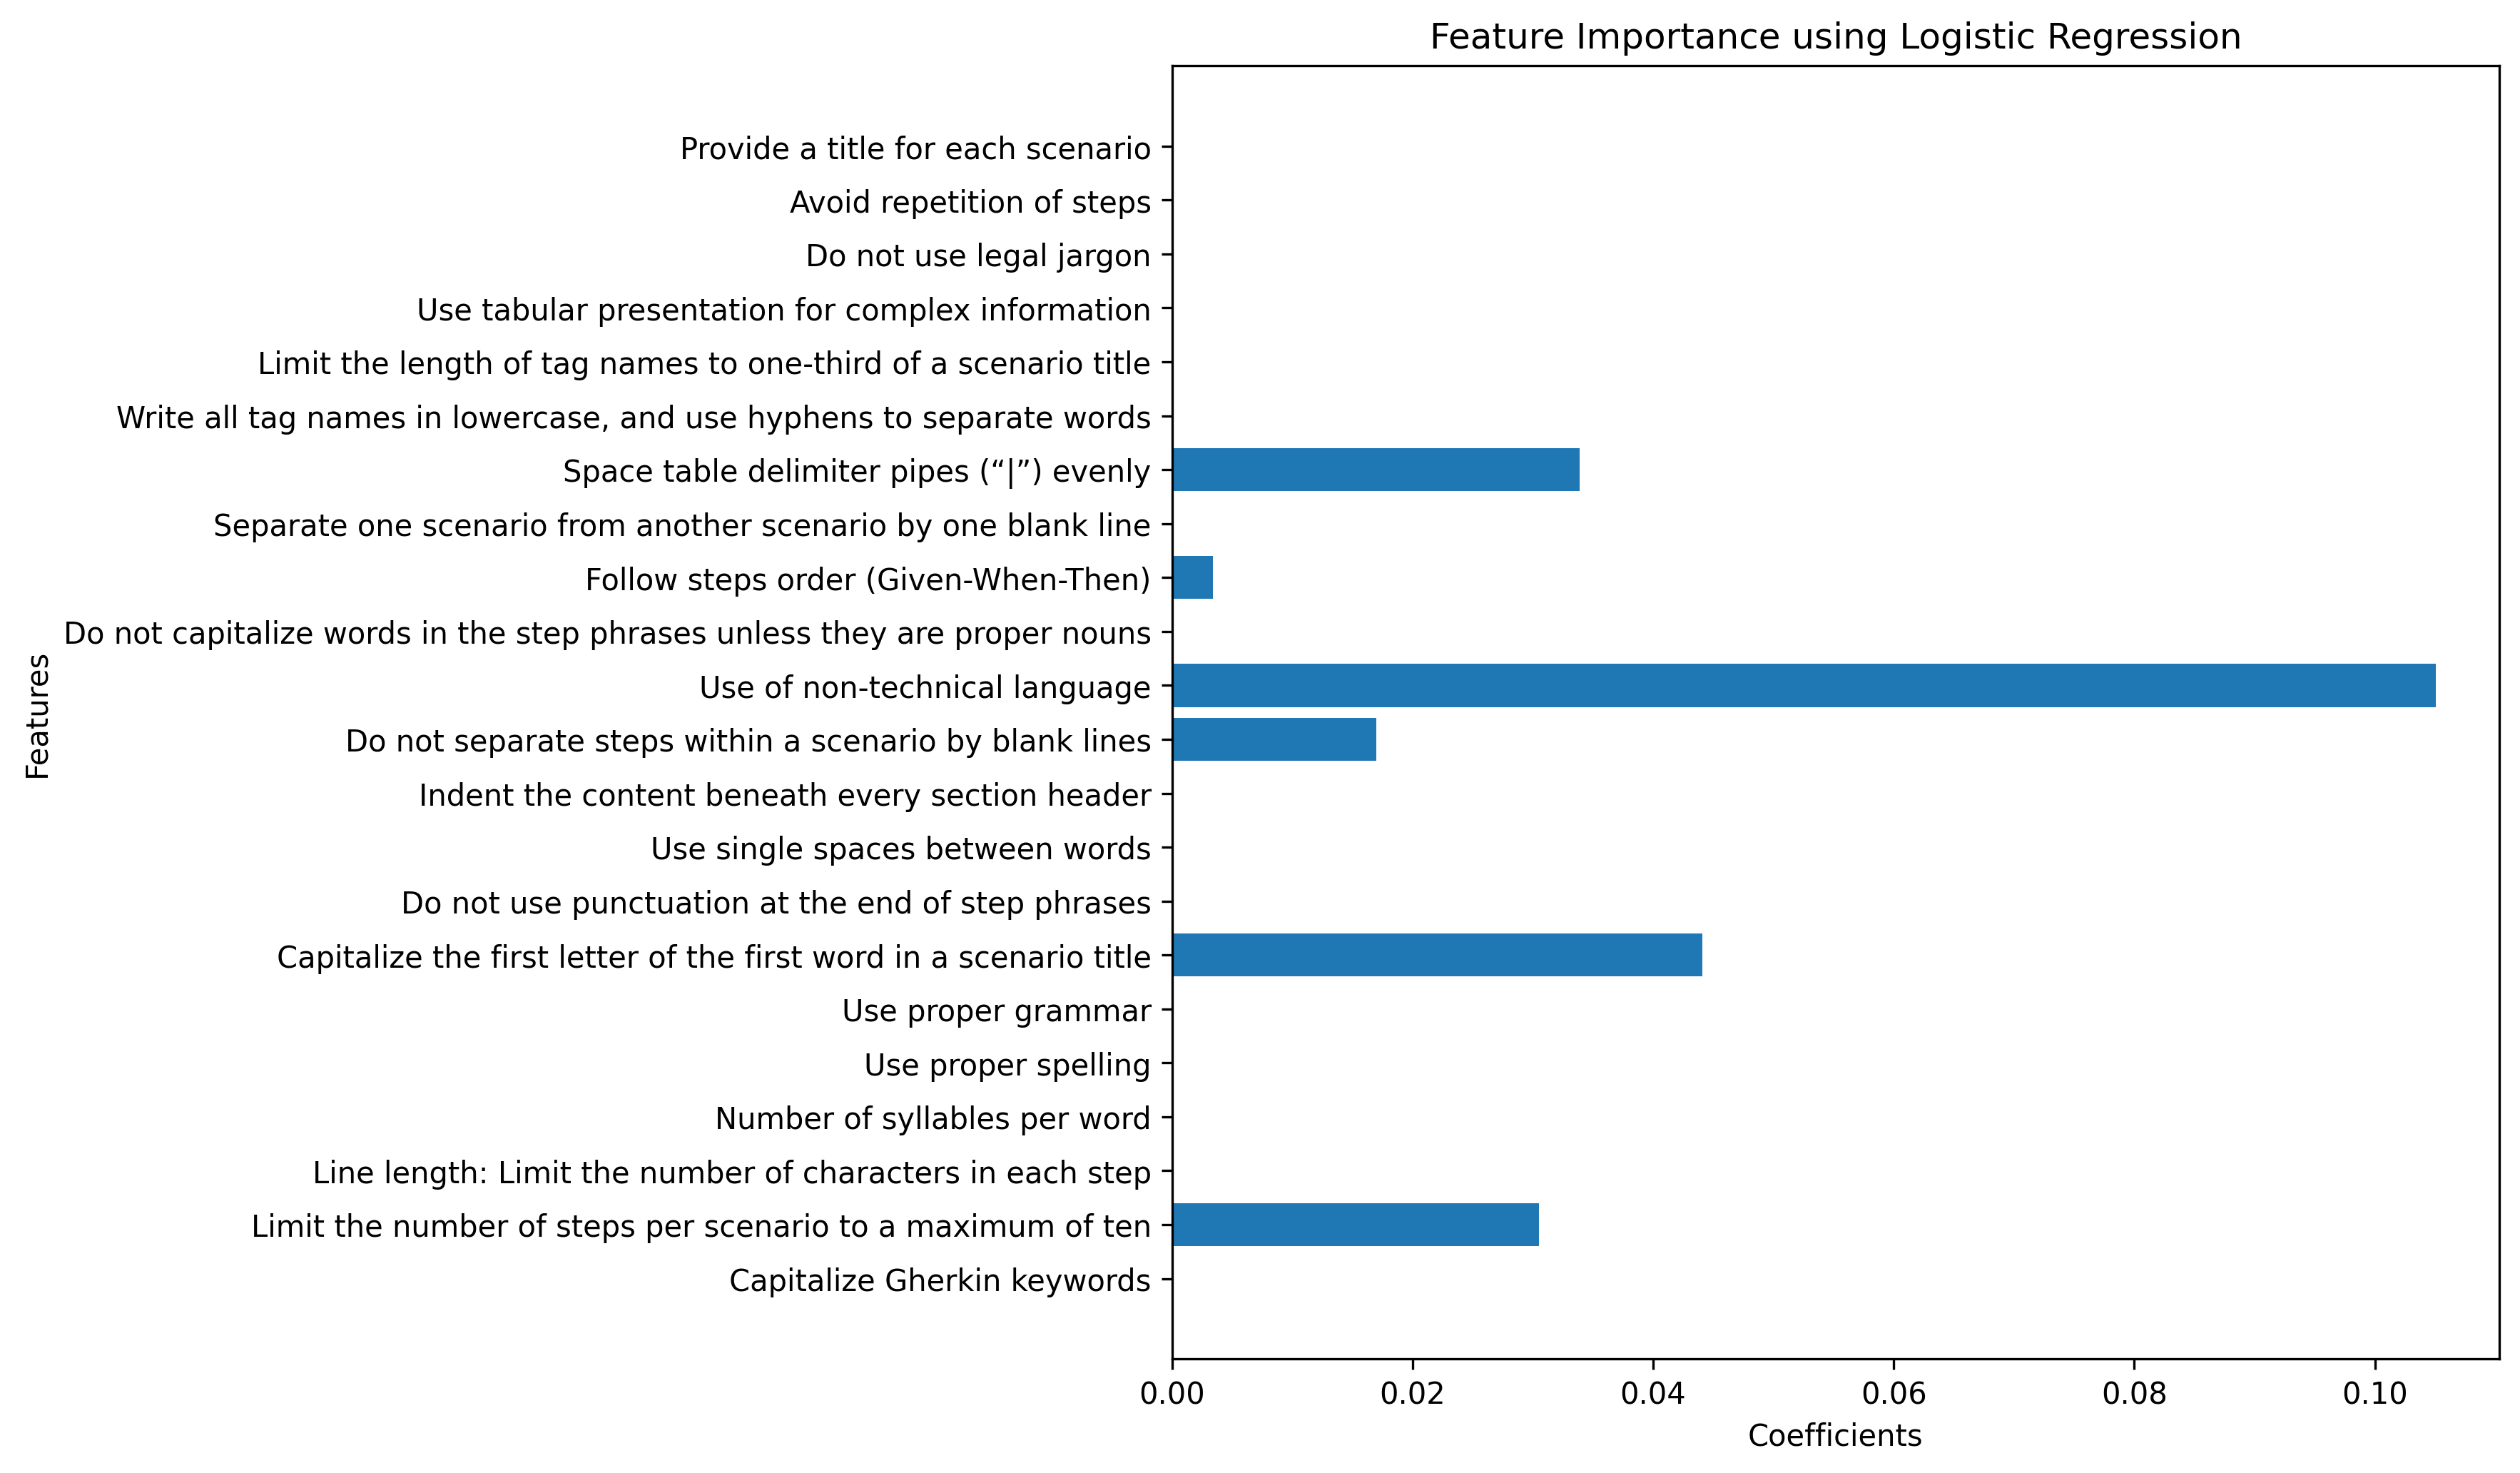

,coef
Use of non-technical language,1.050847e-01
Capitalize the first letter of the first word in a scenario title,4.406780e-02
Space table delimiter pipes (“|”) evenly,3.389831e-02
Limit the number of steps per scenario to a maximum of ten,3.050847e-02
Do not separate steps within a scenario by blank lines,1.694915e-02
Follow steps order (Given-When-Then),3.389831e-03
Use proper grammar,4.440892e-17
Avoid repetition of steps,0.000000e+00
Do not use legal jargon,0.000000e+00
Use tabular presentation for complex information,0.000000e+00


In [44]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0,class_weight='balanced')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

print("=================")
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

print("=================")
from sklearn.metrics import precision_recall_fscore_support
l_regression=precision_recall_fscore_support(y_test, y_pred, average='weighted')
print(l_regression)

print("=================")

imps = permutation_importance(classifier, X_test, y_test)
# print(imps.importances_mean)
importance = imps.importances_mean
features=dataset.columns
coef_dict = {}
for coef, feat in zip(importance,features):
    coef_dict[feat] = coef
#     print (feat,"#",coef_dict[feat])
coef_dict

plt.figure(figsize=(8, 8), dpi=300)
plt.title("Feature Importance using Logistic Regression")
plt.ylabel("Features")
plt.xlabel("Coefficients")
plt.barh(*zip(*coef_dict.items()))
# plt.savefig('DT.png', dpi=300)
plt.show()

print("=================")

# importance = classifier.coef_[0]
# features=dataset.columns
# coef_dict = {}
# for coef, feat in zip(importance,features):
#     coef_dict[feat] = coef
# #     print (feat,"#",coef_dict[feat])
# coef_dict


# plt.figure(figsize=(8, 8), dpi=300)
# plt.title("Feature Importance using Logistic Regression")
# plt.ylabel("Features")
# plt.xlabel("Coefficients")
# plt.barh(*zip(*coef_dict.items()))

# plt.show()

print("=================")
pd.DataFrame(importance, 
             dataset.columns[0:22], 
             columns=['coef']).sort_values(by='coef', ascending=False)


## Training the Multinomial Naive Bayes model on the Training set

[[ 7  4]
 [ 3 45]]
accuracy 0.8813559322033898
               precision    recall  f1-score   support

Less readable       0.70      0.64      0.67        11
     Readable       0.92      0.94      0.93        48

     accuracy                           0.88        59
    macro avg       0.81      0.79      0.80        59
 weighted avg       0.88      0.88      0.88        59

(0.8776547907298512, 0.8813559322033898, 0.879142640806104, None)
Accuracy: 81.28 %
Standard Deviation: 5.26 %


/usr/local/Cellar/jupyterlab/3.0.16/libexec/lib/python3.9/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


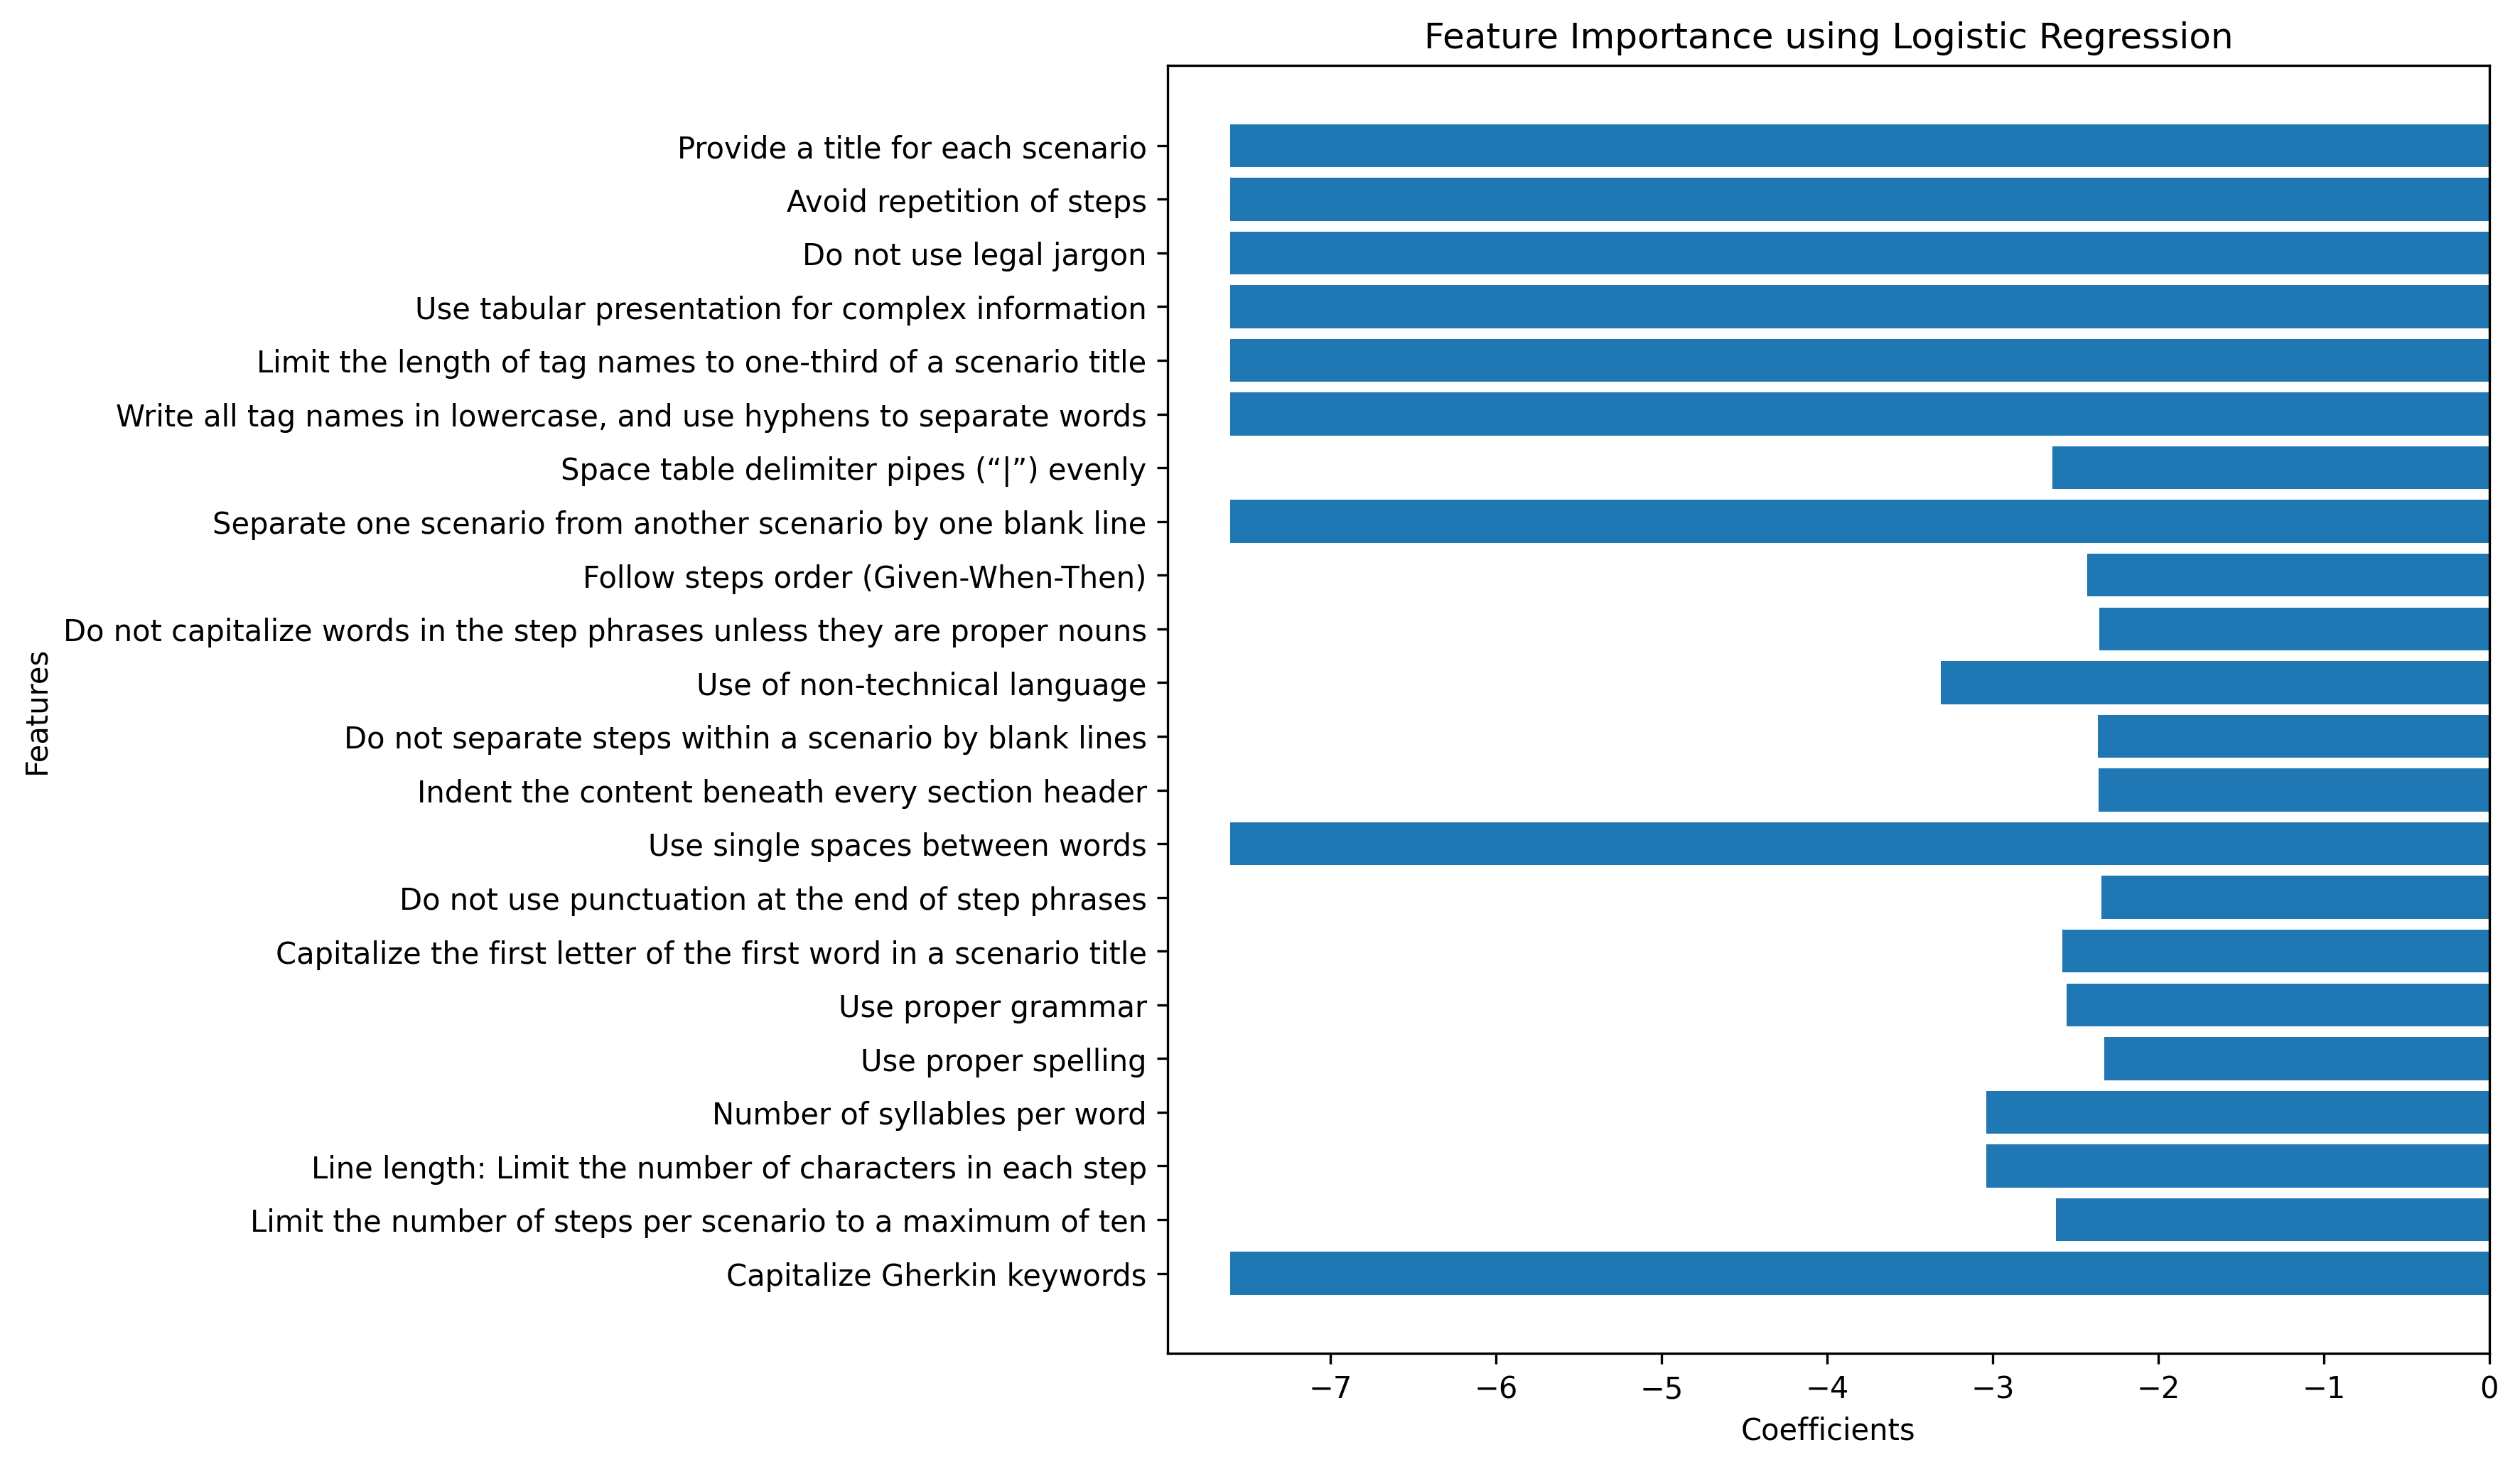

,coef
Use proper spelling,-2.325580
Do not use punctuation at the end of step phrases,-2.341004
Do not capitalize words in the step phrases unless they are proper nouns,-2.356508
Indent the content beneath every section header,-2.361641
Do not separate steps within a scenario by blank lines,-2.365558
Follow steps order (Given-When-Then),-2.427544
Use proper grammar,-2.552965
Capitalize the first letter of the first word in a scenario title,-2.579814
Limit the number of steps per scenario to a maximum of ten,-2.615748
Space table delimiter pipes (“|”) evenly,-2.637270


In [45]:


## Training the Multinomial Naive Bayes Classification model on the Training set
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(X_train, y_train)

## Predicting the Test Xs using Multinomial Naive Bayes trained classifier
from sklearn.metrics import classification_report
y_pred = classifier.predict(X_test)

## Model Evaluation -confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=['Less readable','Readable']))

print("=================")
## Model Evaluation -precision, recall and fscore
from sklearn.metrics import precision_recall_fscore_support
Mult_NB=precision_recall_fscore_support(y_test, y_pred, average='weighted')
print(Mult_NB)

print("=================")
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

print("=================")

importance = classifier.coef_[0]
features=dataset.columns
coef_dict = {}
for coef, feat in zip(importance,features):
    coef_dict[feat] = coef
#     print (feat,"#",coef_dict[feat])
coef_dict


plt.figure(figsize=(8, 8), dpi=300)
plt.title("Feature Importance using Logistic Regression")
plt.ylabel("Features")
plt.xlabel("Coefficients")
plt.barh(*zip(*coef_dict.items()))

plt.show()


print("=================")
pd.DataFrame(importance, 
             dataset.columns[0:22], 
             columns=['coef']).sort_values(by='coef', ascending=False)


## Training the Decision Tree Classification model on the Training set

[[ 8  3]
 [ 1 47]]
Accuracy: 96.67 %
Standard Deviation: 2.82 %
(0.9304708097928437, 0.9322033898305084, 0.9295053614666204, None)


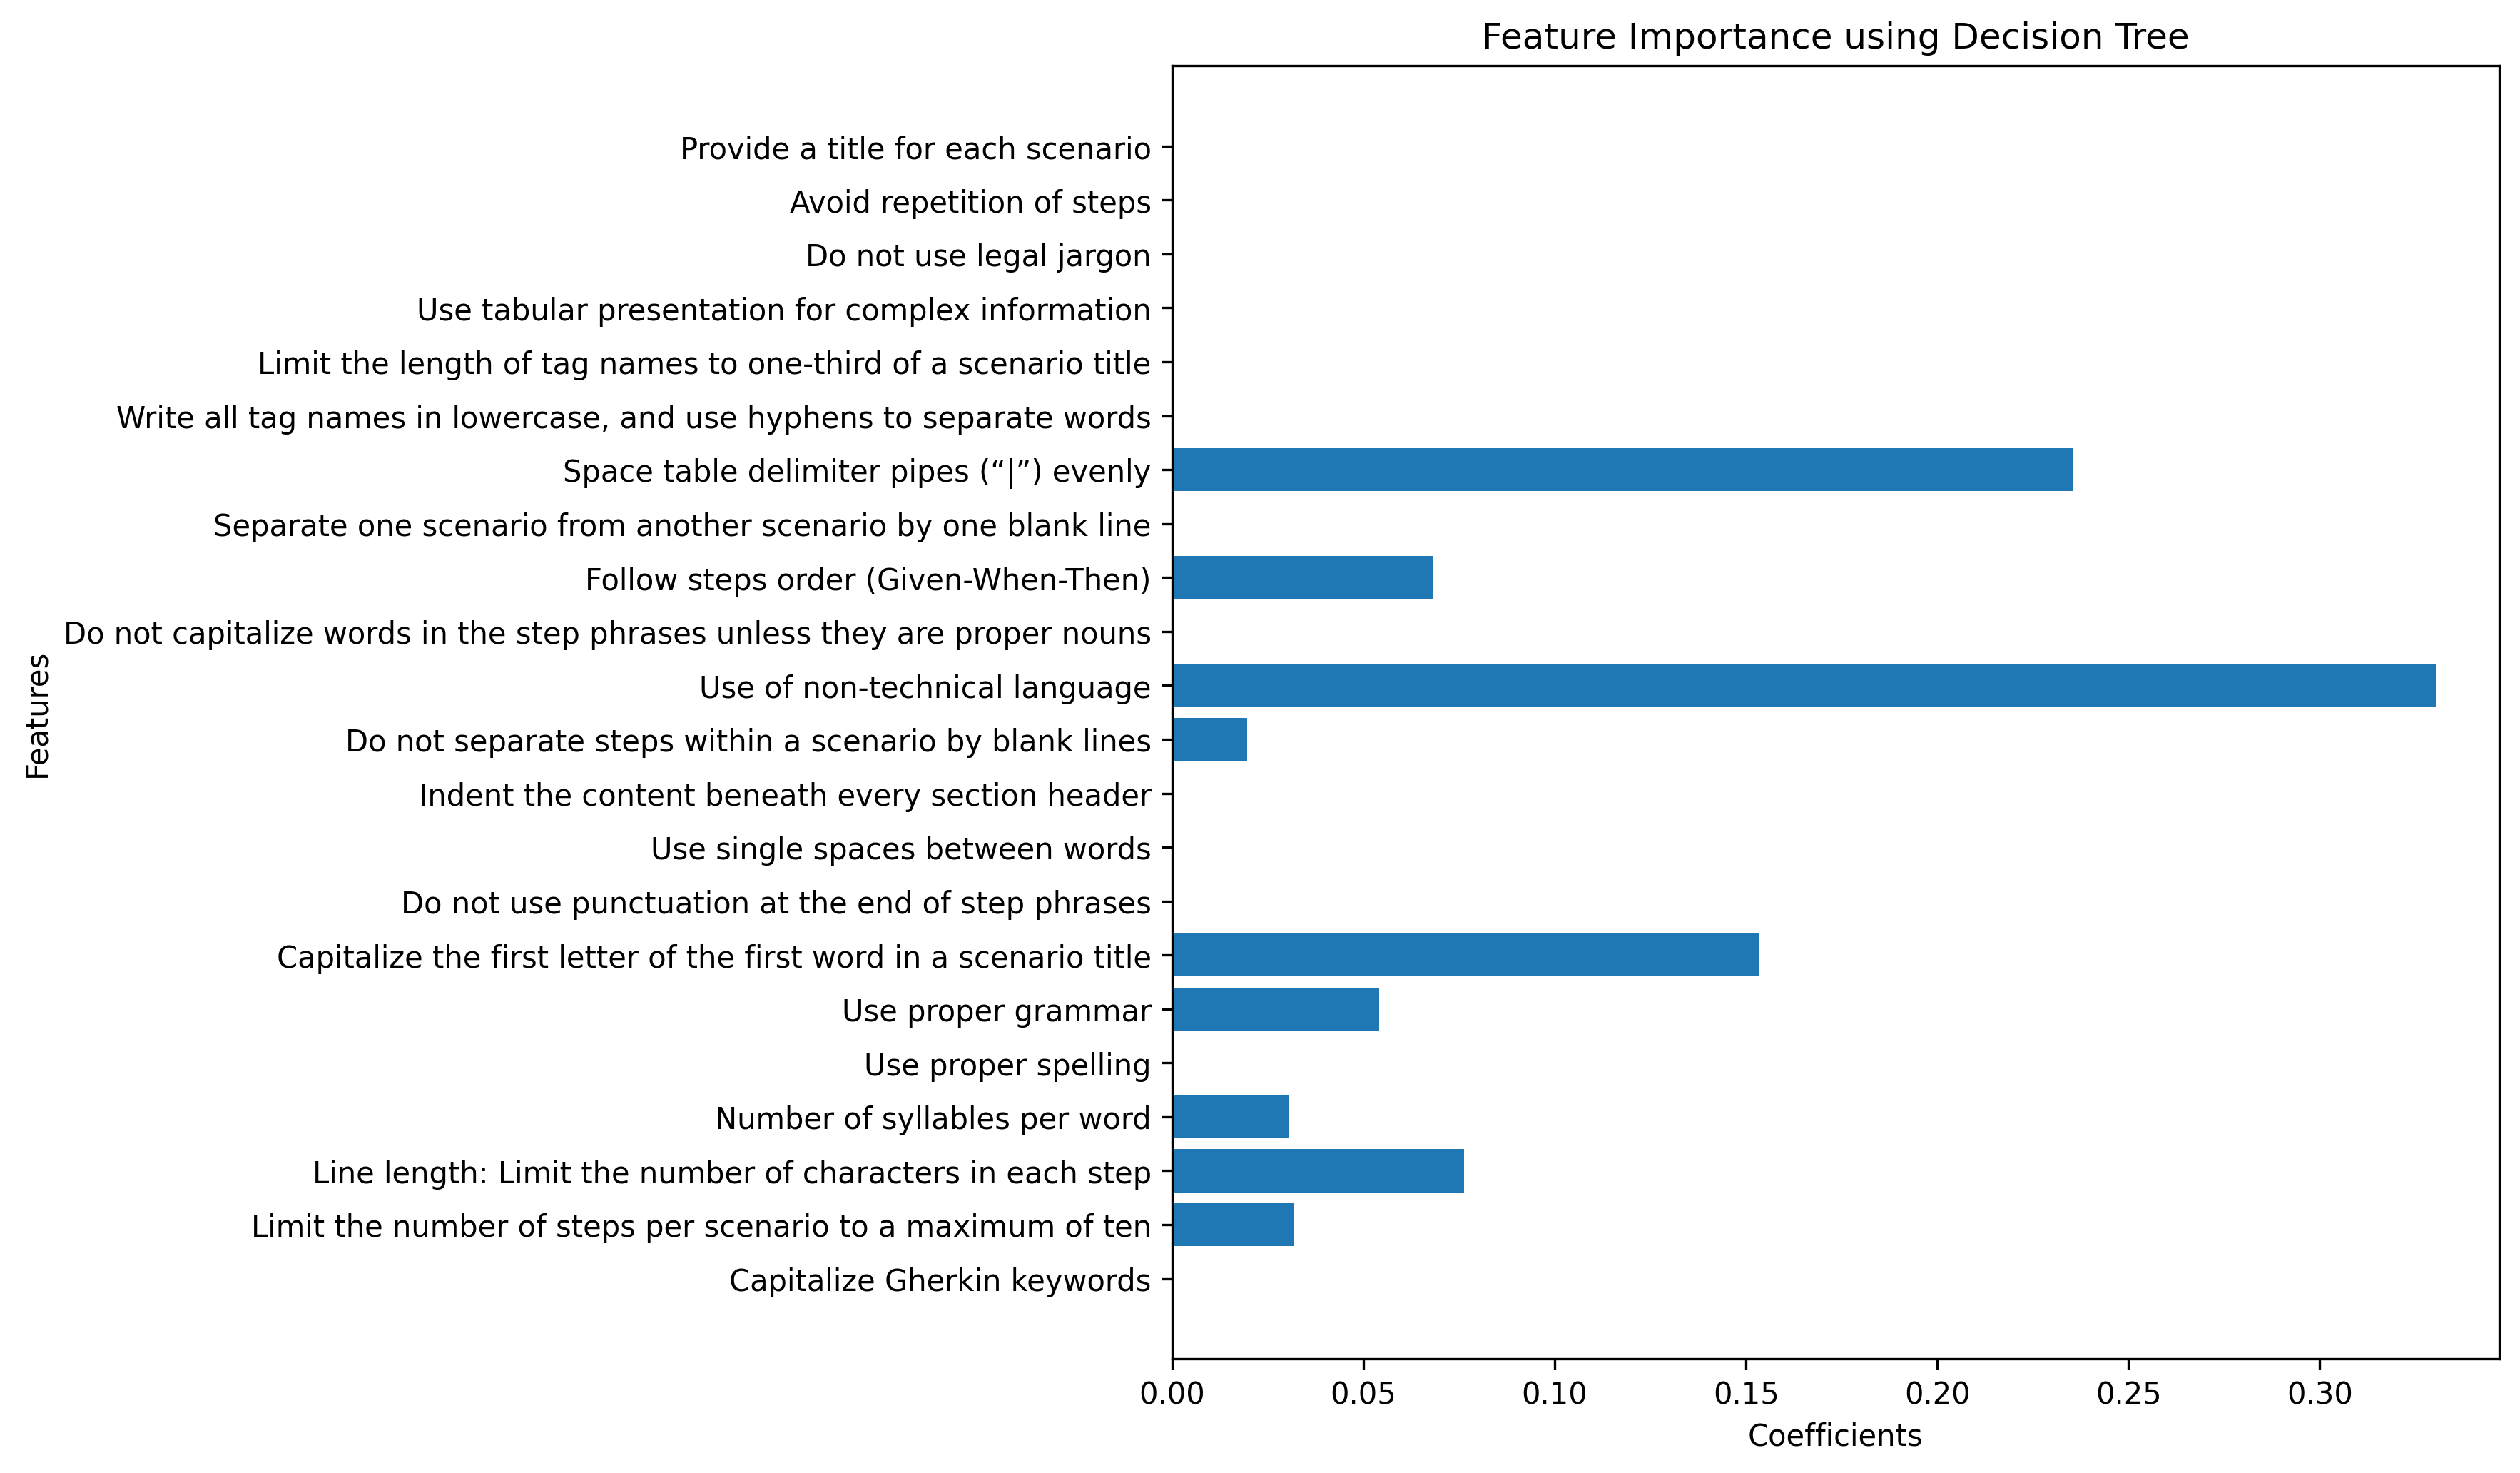

,coef
Use of non-technical language,0.330367
Space table delimiter pipes (“|”) evenly,0.235573
Capitalize the first letter of the first word in a scenario title,0.153480
Line length: Limit the number of characters in each step,0.076294
Follow steps order (Given-When-Then),0.068280
Use proper grammar,0.054194
Limit the number of steps per scenario to a maximum of ten,0.031698
Number of syllables per word,0.030563
Do not separate steps within a scenario by blank lines,0.019551
Avoid repetition of steps,0.000000


In [46]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
# clf = LogisticRegression(random_state=0, class_weight='balanced')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

print("=================")

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

print("=================")
from sklearn.metrics import precision_recall_fscore_support
dt=precision_recall_fscore_support(y_test, y_pred, average='weighted')
print(dt)

print("=================")

importance = classifier.feature_importances_
features=dataset.columns
coef_dict = {}
for coef, feat in zip(importance,features):
    coef_dict[feat] = coef
#     print (feat,"#",coef_dict[feat])
coef_dict

plt.figure(figsize=(8, 8), dpi=300)
plt.title("Feature Importance using Decision Tree")
plt.ylabel("Features")
plt.xlabel("Coefficients")
plt.barh(*zip(*coef_dict.items()))
# plt.savefig('DT.png', dpi=300)

plt.show()


print("=================")
pd.DataFrame(importance, 
             dataset.columns[0:22], 
             columns=['coef']).sort_values(by='coef', ascending=False)


## Applying k-Fold Cross Validation


In [47]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.67 %
Standard Deviation: 2.82 %


In [48]:
p_r_f= "(precision {:.4f}, recall {:.4f}, fscore {:.4f})"
print("K-NN "+p_r_f.format(*k_nn[:3]))
print("Kernel SVM "+p_r_f.format(*k_svm))
print("Naive Bayes "+p_r_f.format(*nb))
print("Random Forest "+p_r_f.format(*rf))
print("SVM "+p_r_f.format(*svm))
print("Logistic Regression "+p_r_f.format(*l_regression))
print("Multinomial NB "+p_r_f.format(*Mult_NB))
print("Decision Tree "+p_r_f.format(*dt))

K-NN (precision 0.9521, recall 0.9492, fscore 0.9459)
Kernel SVM (precision 0.9188, recall 0.9153, fscore 0.9167)
Naive Bayes (precision 0.8884, recall 0.8644, fscore 0.8719)
Random Forest (precision 0.9305, recall 0.9322, fscore 0.9295)
SVM (precision 0.8806, recall 0.8475, fscore 0.8574)
Logistic Regression (precision 0.9073, recall 0.8983, fscore 0.9015)
Multinomial NB (precision 0.8777, recall 0.8814, fscore 0.8791)
Decision Tree (precision 0.9305, recall 0.9322, fscore 0.9295)
